In [217]:
import numpy as np
import matplotlib.pyplot as plt
import wave

### Question 1

In [218]:
# function for convolving a feature vector with a kernel
def convolve(input, kernel):
  input_size = input.size
  kernel_size = kernel.size

  # flipping the kernel
  kernel = np.flip(kernel)
  padding = kernel_size // 2
  output_size = int((input_size - kernel_size + 2 * padding) + 1)

  # padding the input array with zeros on both ends
  padded = np.zeros((input_size + padding * 2))
  # setting inner portion to the input array
  padded[padding:-1 * padding] = input

  output = np.zeros(output_size)
  time_output = np.arange(-int(output_size/2), int(output_size/2)+1)
  # filling the output array with the convolved values
  for i in range(output_size):
    output[i] = (kernel * padded[i:i + kernel_size]).sum()

  return output

In [219]:
# function to calculate DTFT of a given x
def DTFT_Q1(x):
  n = x.size
  samples = 100
  omega = np.linspace(-np.pi, np.pi, samples)
  X = np.zeros(samples, dtype=complex)
  for w in range(samples):
    wn = omega[w] * (np.arange(n))
    real = (x * np.cos(wn)).sum()
    imag = (x * np.sin(wn)).sum()

    # X(e^-j*omega[w]) = SUM(x * cos(omega[w])) - j *  SUM(x * sin(omega[w])) = A - jB
    X[w] = real - imag * np.array([1j])

  magnitude = np.sqrt((X.real)*(X.real) + (X.imag)*(X.imag))
  phase = np.angle(X)

  return magnitude, phase, omega

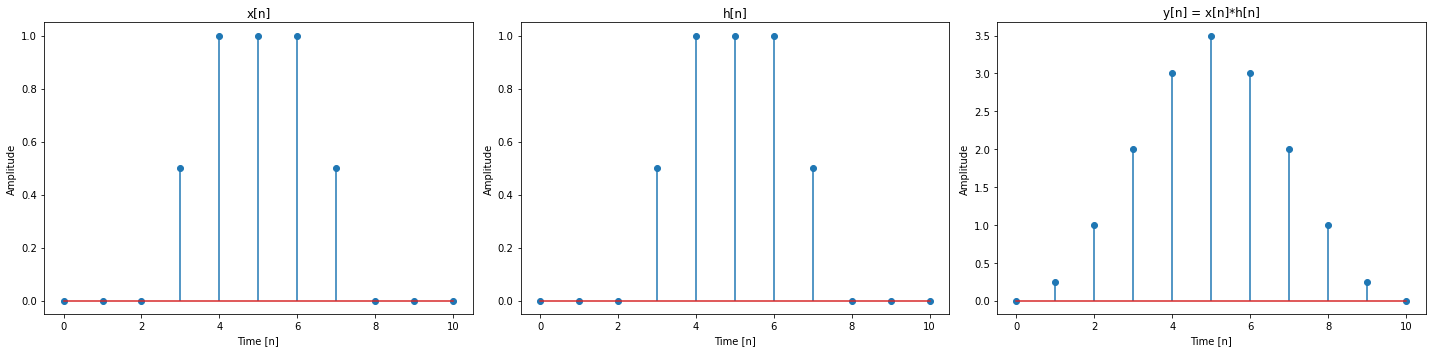

In [220]:
x = np.array([0, 0, 0, 0.5, 1, 1, 1, 0.5, 0, 0, 0]) # x[n] = pi[n/4 - N]
h = np.array([0, 0, 0, 0.5, 1, 1, 1, 0.5, 0, 0, 0]) # h[n] = pi[n/4 - N]
y = convolve(x, h)

# plotting x, h and y
plots, graphs = plt.subplots(1, 3, figsize=(20, 5))

graphs[0].set_title("x[n]")
graphs[0].set(xlabel='Time [n]', ylabel='Amplitude')
graphs[0].stem(x, use_line_collection = True)

graphs[1].set_title("h[n]")
graphs[1].set(xlabel='Time [n]', ylabel='Amplitude')
graphs[1].stem(h, use_line_collection = True)

graphs[2].set_title("y[n] = x[n]*h[n]")
graphs[2].set(xlabel='Time [n]', ylabel='Amplitude')
graphs[2].stem(y, use_line_collection = True)

plots.tight_layout()
plots.show()

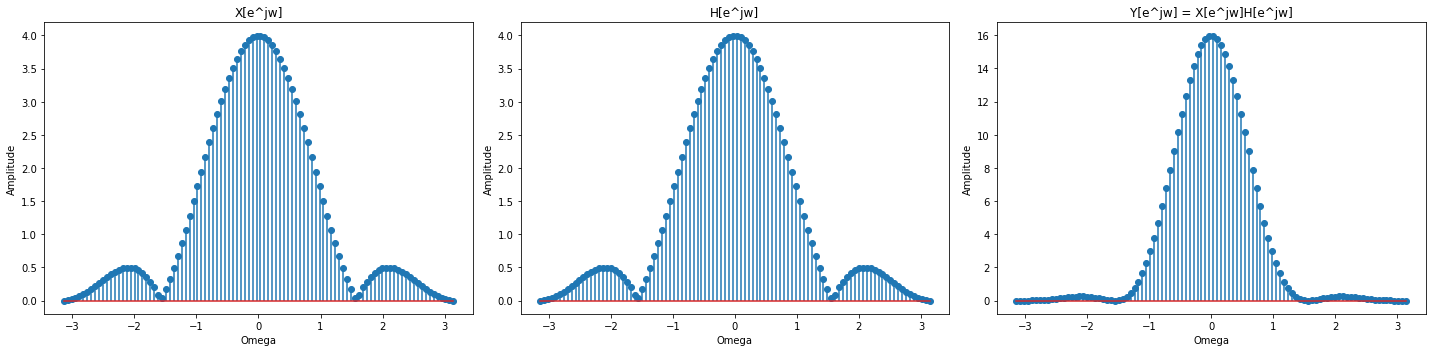

In [221]:
X, X_phase, X_omega = DTFT_Q1(x)
H, H_phase, H_omega = DTFT_Q1(h)
Y = np.multiply(X, H)

# plotting X, H and Y
plots, graphs = plt.subplots(1, 3, figsize=(20, 5))

graphs[0].set_title("X[e^jw]")
graphs[0].set(xlabel='Omega', ylabel='Amplitude')
graphs[0].stem(X_omega, X, use_line_collection = True)

graphs[1].set_title("H[e^jw]")
graphs[1].set(xlabel='Omega', ylabel='Amplitude')
graphs[1].stem(H_omega, H, use_line_collection = True)

graphs[2].set_title("Y[e^jw] = X[e^jw]H[e^jw]")
graphs[2].set(xlabel='Omega', ylabel='Amplitude')
graphs[2].stem(X_omega, Y, use_line_collection = True)

plots.tight_layout()
plots.show()

Here, we've convolved two rectangle functions in the time domain, which as expected gave the lambda function.\
To do the same operation in the frequency domain, we took the DTFT of `x[n]` and `h[n]` which, as we know are the sinc function.\
Now, to confirm whether convoltuion in time domain is equivalent to multiiplication in the frequency domain, we'll plot the DTFT of y[n] to compare it with Y[e^jw].

Since both the graphs are exactly the same, we have verified the multiplication/convolution property.


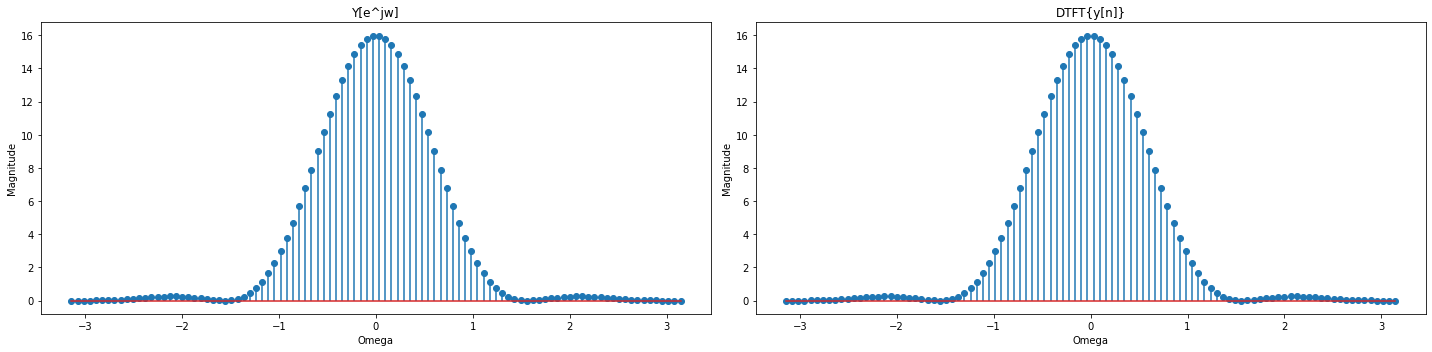

In [222]:
check_Y = DTFT_Q1(y)

# comparing the two plots side by side
plots, graphs = plt.subplots(1, 2, figsize=(20, 5))

graphs[0].set_title("Y[e^jw]")
graphs[0].set(xlabel='Omega', ylabel='Magnitude')
graphs[0].stem(X_omega, Y, use_line_collection = True)

graphs[1].set_title("DTFT{y[n]}")
graphs[1].set(xlabel='Omega', ylabel='Magnitude')
graphs[1].stem(check_Y[2], check_Y[0], use_line_collection = True)

plots.tight_layout()
plots.show()

print("Since both the graphs are exactly the same, we have verified the multiplication/convolution property.")

### Question 2

To plot the magnitude and phrase of the `H(e^jw)` functions, we need to calculate the DTFT of `h[n]`.\
 We are reusing the code from the previous assignments to do so.

In [223]:
def plot_graphs(h, time, magnitude, phase, omega):
  plots, graphs = plt.subplots(1, 3, figsize=(20, 5))

  graphs[0].set_title("h[n]")
  graphs[0].set(xlabel='Time [n]', ylabel='Amplitude')
  graphs[0].stem(time, h, use_line_collection = True)

  graphs[1].set_title("DTFT Magnitude of H(e^jw)")
  graphs[1].set(xlabel='Omega', ylabel='Magnitude')
  graphs[1].stem(omega, magnitude, use_line_collection = True)

  graphs[2].set_title("DTFT Phase of H(e^jw)")
  graphs[2].set(xlabel='Omega', ylabel='Phase')
  graphs[2].stem(omega, phase, use_line_collection = True)

  plots.tight_layout()
  plots.show()

In [224]:
# function to calculate DTFT of a given x
def DTFT(x, time):
  samples = 100
  omega = np.linspace(-np.pi, np.pi, samples)
  X = np.zeros(samples, dtype=complex)
  for w in range(samples):
    wn = omega[w] * (time)
    real = (x * np.cos(wn)).sum()
    imag = (x * np.sin(wn)).sum()

    # X(e^-j*omega[w]) = SUM(x * cos(omega[w])) - j *  SUM(x * sin(omega[w])) = A - jB
    X[w] = real - imag * np.array([1j])

  magnitude = np.sqrt((X.real)*(X.real) + (X.imag)*(X.imag))
  phase = np.angle(X)

  plot_graphs(x, time, magnitude, phase, omega)

##### a) `h[n] = delta[n]`

This kernel allows all the frequencies to pass through as they are.
Therefore, this filter doesn't modify the input signal in any way.


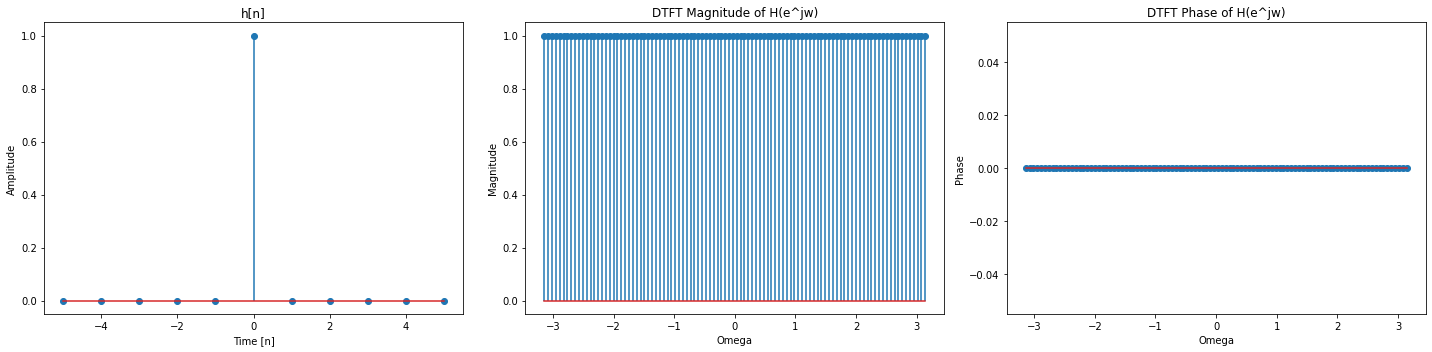

In [225]:
start_n = -5
h_a = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
time_a = np.arange(start_n, h_a.size + start_n)
DTFT(h_a, time_a)
print("This kernel allows all the frequencies to pass through as they are.")
print("Therefore, this filter doesn't modify the input signal in any way.")

##### b) `h[n] = 0.5 * delta[n] - 0.5 * delta[n - 1]`

If we consider the section only between -pi to pi, this kernel will allow higher frequencies to pass and block the lower ones.
From the phase spectrum, it is clear that this spectrum is odd.


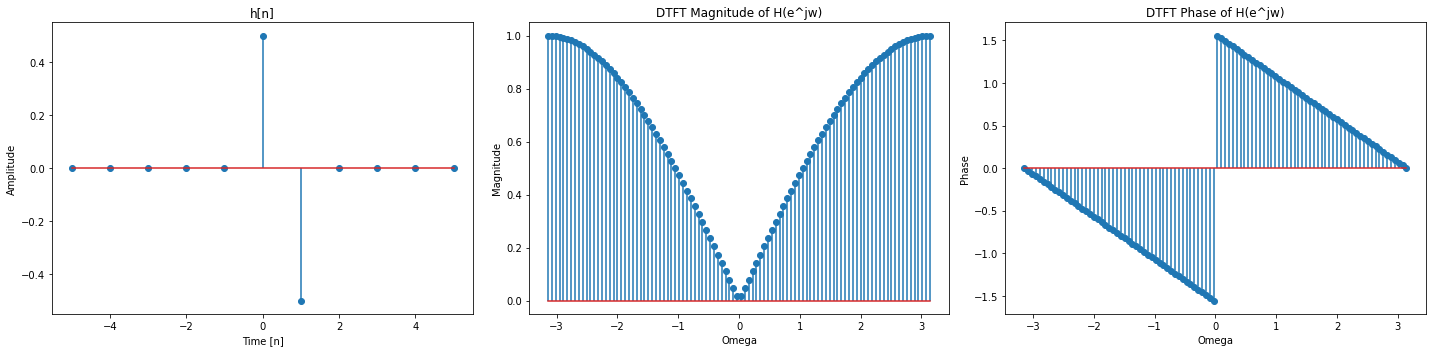

In [226]:
start_n = -5
h1 = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) # delta[n]
h2 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) # delta[n - 1]
h_b = 0.5 * h1 - 0.5 * h2                        # 0.5 * delta[n] - 0.5 * delta[n - 1]
time_b = np.arange(start_n, h_b.size + start_n)
DTFT(h_b, time_b)
print("If we consider the section only between -pi to pi, this kernel will allow higher frequencies to pass and block the lower ones.")
print("From the phase spectrum, it is clear that this spectrum is odd.")

##### c) `h[n] = 0.5 * delta[n] + 0.5 * delta[n - 1]`

This kernel does the opposite of what 2b does.
If we consider the section only between -pi to pi, this kernel will allow lower frequencies to pass and suppress the higher ones.
From the phase spectrum, it is clear that this spectrum is odd.


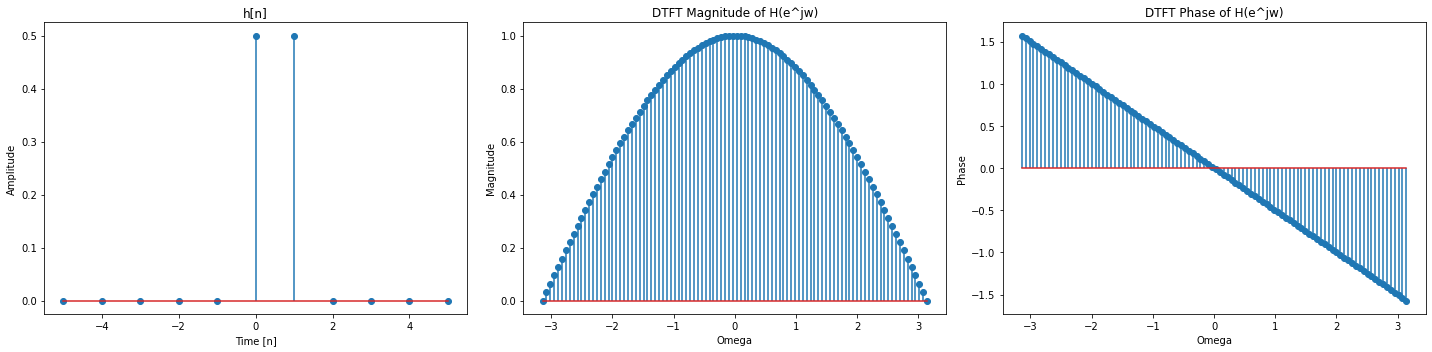

In [227]:
start_n = -5
h1 = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) # delta[n]
h2 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) # delta[n - 1]
h_c = 0.5 * h1 + 0.5 * h2                        # 0.5 * delta[n] - 0.5 * delta[n - 1]
time_c = np.arange(start_n, h_c.size + start_n)
DTFT(h_c, time_c)
print("This kernel does the opposite of what 2b does.")
print("If we consider the section only between -pi to pi, this kernel will allow lower frequencies to pass and suppress the higher ones.")
print("From the phase spectrum, it is clear that this spectrum is odd.")

##### d) `h[n] = 0.33 * delta[n] + 0.33 * delta[n - 1] + 0.33 * delta[n - 2]`

This kernel acts like a low pass filter with a shorter bandwidth, and allows some higher frequencies to pass through as well.
From the phase spectrum, it is clear that this spectrum is odd.


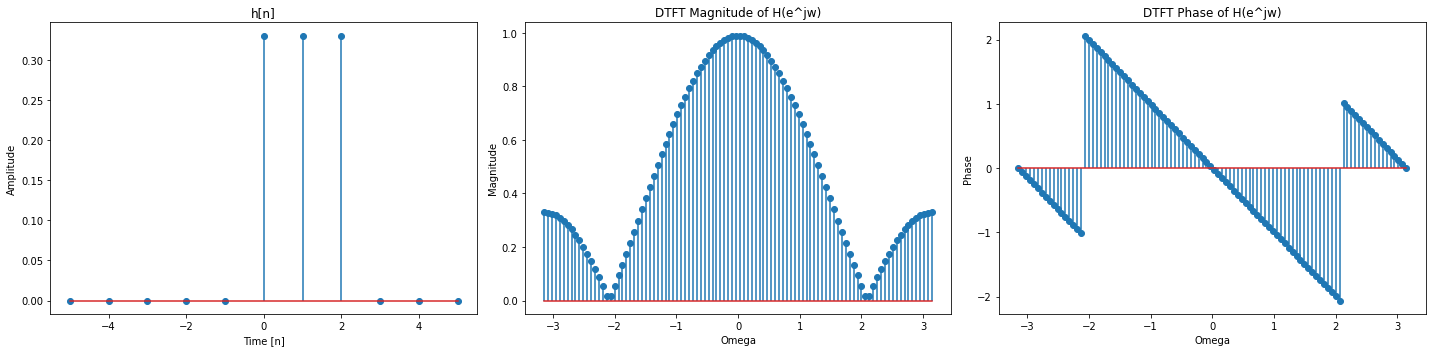

In [228]:
start_n = -5
h1 = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) # delta[n]
h2 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) # delta[n - 1]
h3 = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) # delta[n - 2]
h_d = 0.33 * h1 + 0.33 * h2 + 0.33 * h3          # 0.33 * delta[n] + 0.33 * delta[n - 1] - 0.33 * delta[n - 2]
time_d = np.arange(start_n, h_d.size + start_n)
DTFT(h_d, time_d)
print("This kernel acts like a low pass filter with a shorter bandwidth, and allows some higher frequencies to pass through as well.")
print("From the phase spectrum, it is clear that this spectrum is odd.")

##### e) `h[n] = -0.25 * delta[n] + 0.50 * delta[n - 1] - 0.25 * delta[n - 2]`

If we consider the section only between -pi to pi, this kernel will allow higher frequencies to pass and block the lower ones.
On comparing this with b, the gradient is much smoother here than in part b.
From the phase spectrum, it is clear that this spectrum is odd.


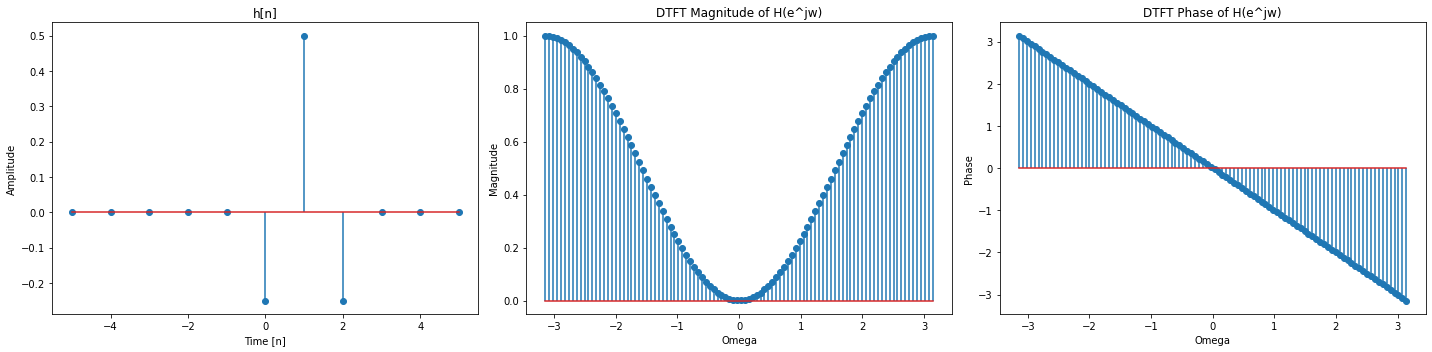

In [229]:
start_n = -5
h1 = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) # delta[n]
h2 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) # delta[n - 1]
h3 = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) # delta[n - 2]
h_e = -0.25 * h1 + 0.50 * h2 - 0.25 * h3         # -0.25 * delta[n] + 0.50 * delta[n - 1] - 0.25 * delta[n - 2]
time_e = np.arange(start_n, h_e.size + start_n)
DTFT(h_e, time_e)
print("If we consider the section only between -pi to pi, this kernel will allow higher frequencies to pass and block the lower ones.")
print("On comparing this with b, the gradient is much smoother here than in part b.")
print("From the phase spectrum, it is clear that this spectrum is odd.")

##### f) `h[n] = 1 for 0 <= n <= 5, 0 otherwise`

This loosely resembles a sinc function, which implies that this is a kind of a low pass filter.
From the phase spectrum, it is clear that this spectrum is odd.


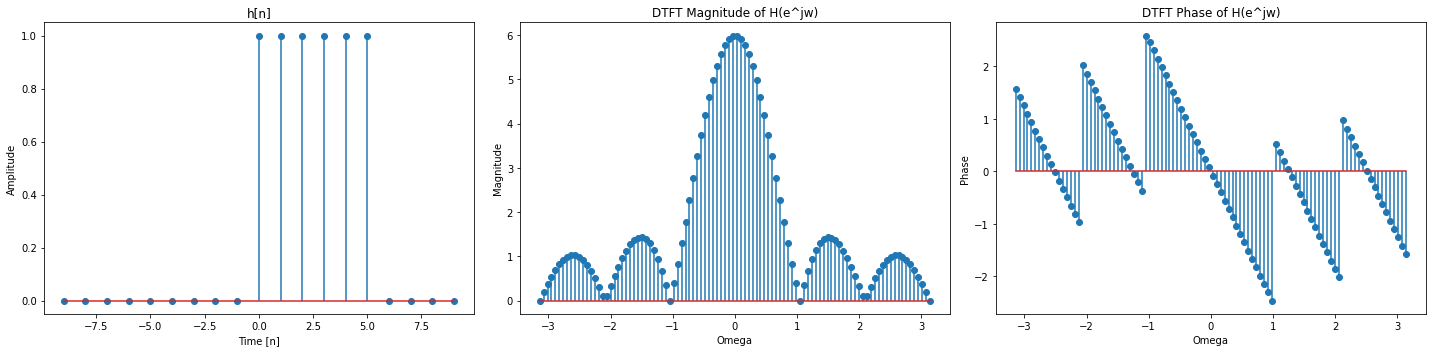

In [230]:
start_n = -9
h_f = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
time_f = np.arange(start_n, h_f.size + start_n)
DTFT(h_f, time_f)
print("This loosely resembles a sinc function, which implies that this is a kind of a low pass filter.")
print("From the phase spectrum, it is clear that this spectrum is odd.")

##### g) `h[n] = n for 0 <= n <= 5, 0 otherwise`

This filter boosts the lower frequencies way more than the higer ones. This filter probably boosts the bass of an audio.
From the phase spectrum, it is clear that this spectrum is odd.


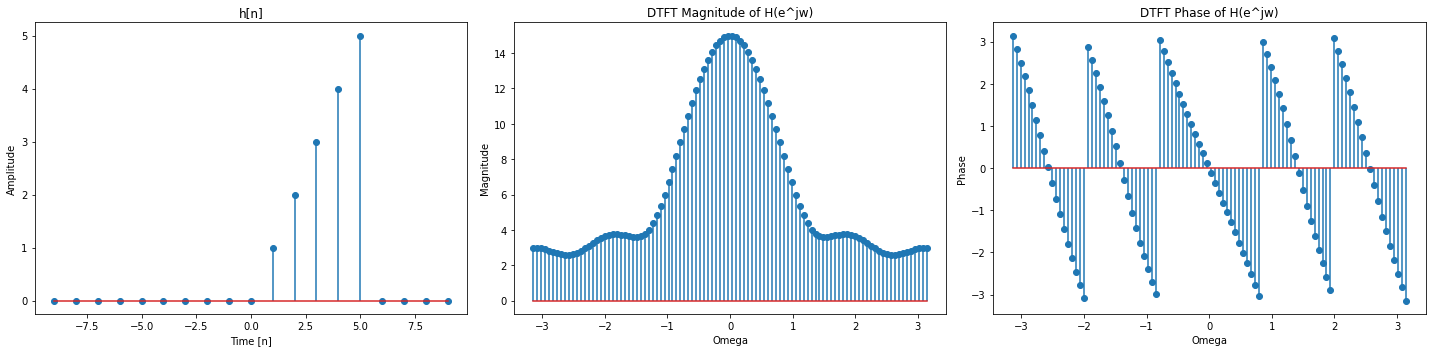

In [231]:
start_n = -9
h_g = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0])
time_g = np.arange(start_n, h_g.size + start_n)
DTFT(h_g, time_g)
print("This filter boosts the lower frequencies way more than the higer ones. This filter probably boosts the bass of an audio.")
print("From the phase spectrum, it is clear that this spectrum is odd.")

##### h) `x[n] = n + 1 for 0 <= n <= 5, h[10 - n] for 5 < n <= 10, 0 otherwise`

This loosely resembles a sinc^2 function, which implies that this is an efficient low pass filter.
From the phase spectrum, it is clear that this spectrum is odd.


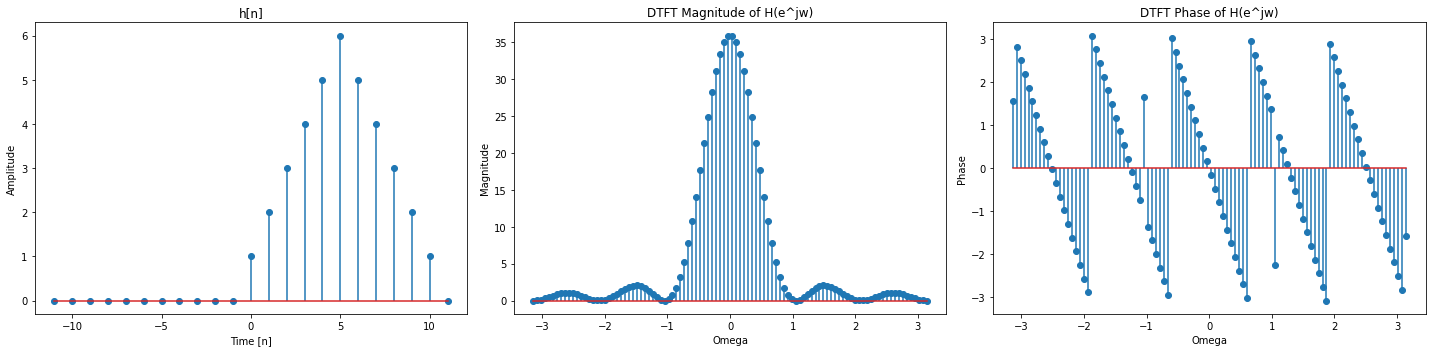

In [232]:
start_n = -11
h_h = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1, 0])
time_h = np.arange(start_n, h_h.size + start_n)
DTFT(h_h, time_h)
print("This loosely resembles a sinc^2 function, which implies that this is an efficient low pass filter.")
print("From the phase spectrum, it is clear that this spectrum is odd.")

##### i) `h[n] = cos(πn) for −N ≤ n ≤ N`

We're considering three cases: N = 5, 10, and 15

This kernel appears to be a kind of a high pass filter. Depending on the values of N, we can manage the accuracy of this high pass filter.
From the phase spectrum, it is clear that this spectrum is odd.


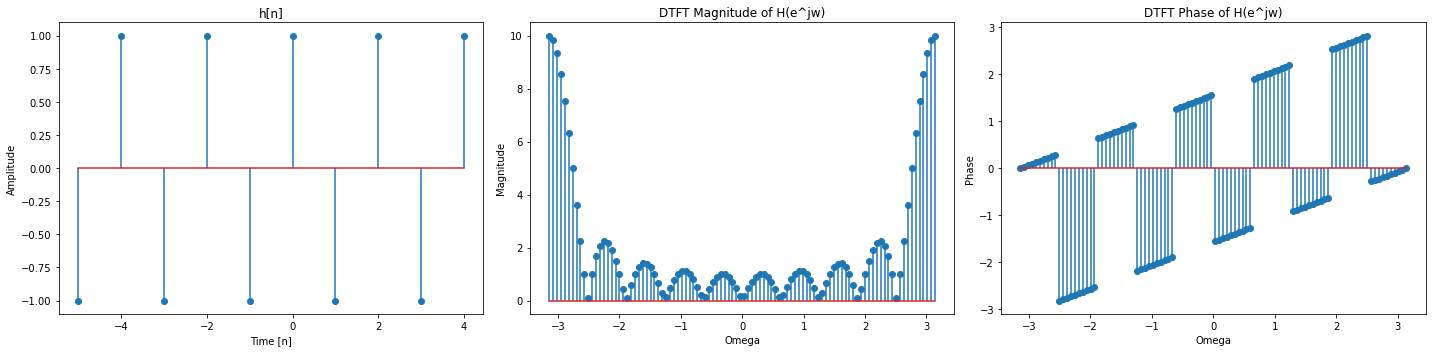

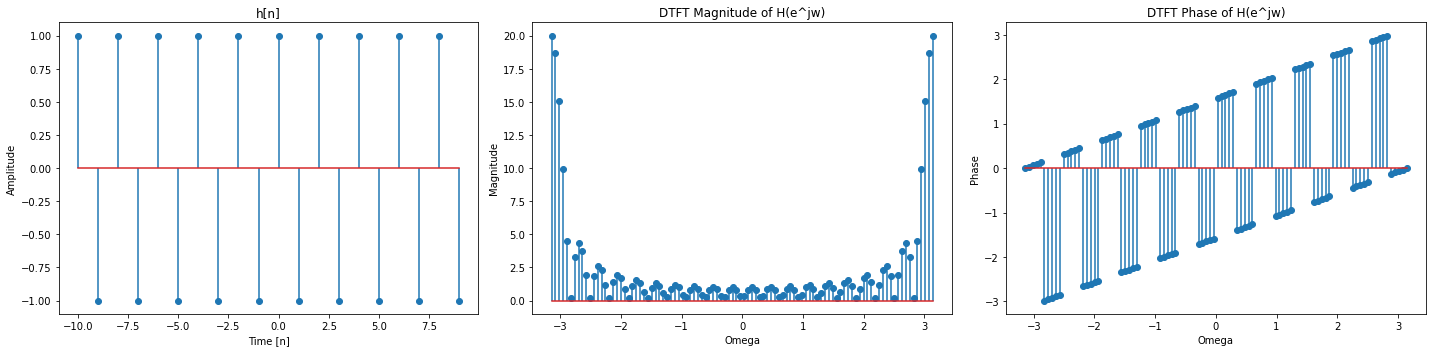

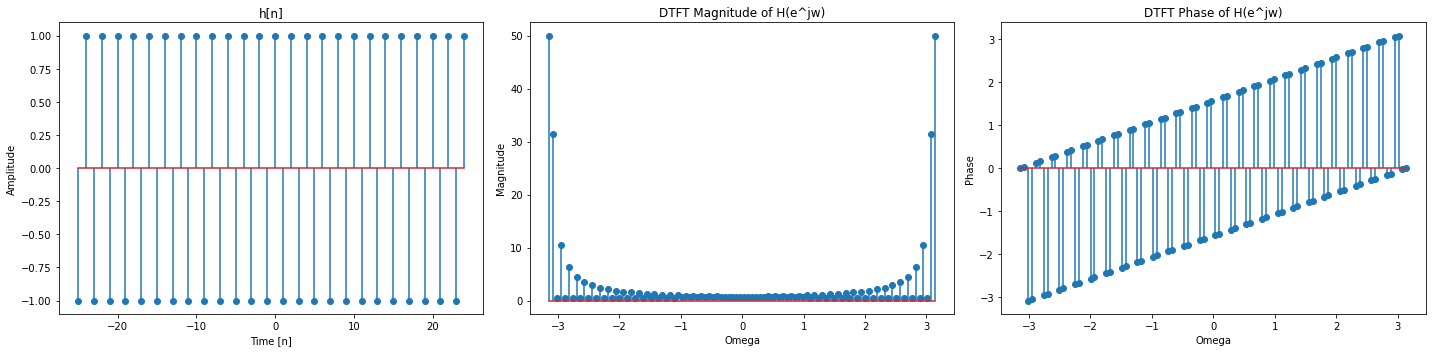

In [233]:
N = 5
h_i = np.arange(-N, N)
h_i = np.cos(np.pi * h_i)
time_i = np.arange(-N, h_i.size - N)
DTFT(h_i, time_i)

N = 10
h_i = np.arange(-N, N)
h_i = np.cos(np.pi * h_i)
time_i = np.arange(-N, h_i.size - N)
DTFT(h_i, time_i)

N = 25
h_i = np.arange(-N, N)
h_i = np.cos(np.pi * h_i)
time_i = np.arange(-N, h_i.size - N)
DTFT(h_i, time_i)

print("This kernel appears to be a kind of a high pass filter. Depending on the values of N, we can manage the accuracy of this high pass filter.")
print("From the phase spectrum, it is clear that this spectrum is odd.")

##### j) `h[n] = sin(ω0*n)/πn for −M ≤ n ≤ M an h[0] = 1`

We're considering the following values of M and ω0: \
M = 10, 25 \
ω0 = 0.5π, π, 5 \

From the magnitude spectrums, it appears as though this kernel can act both like an LPF or a HPF, 
or even a delta function depending on the values we chose for the constants and the number of samples.


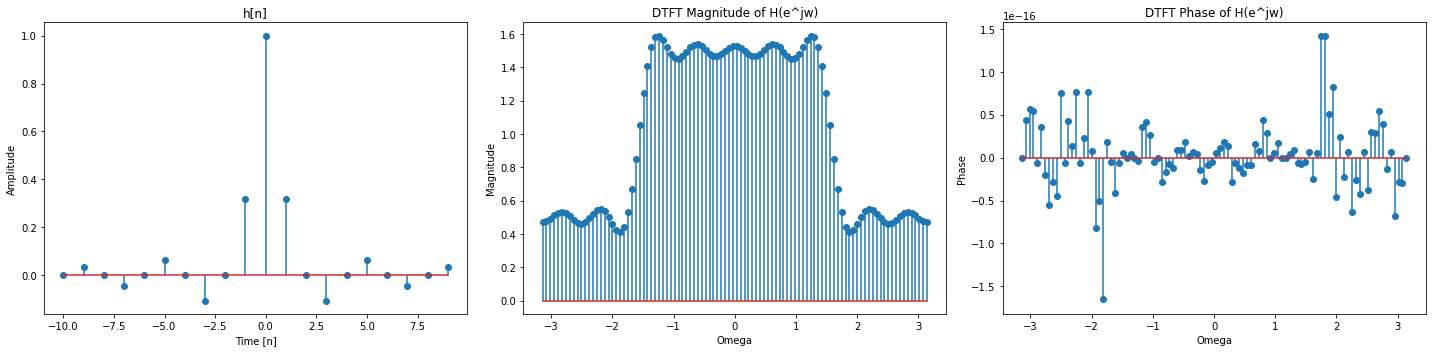

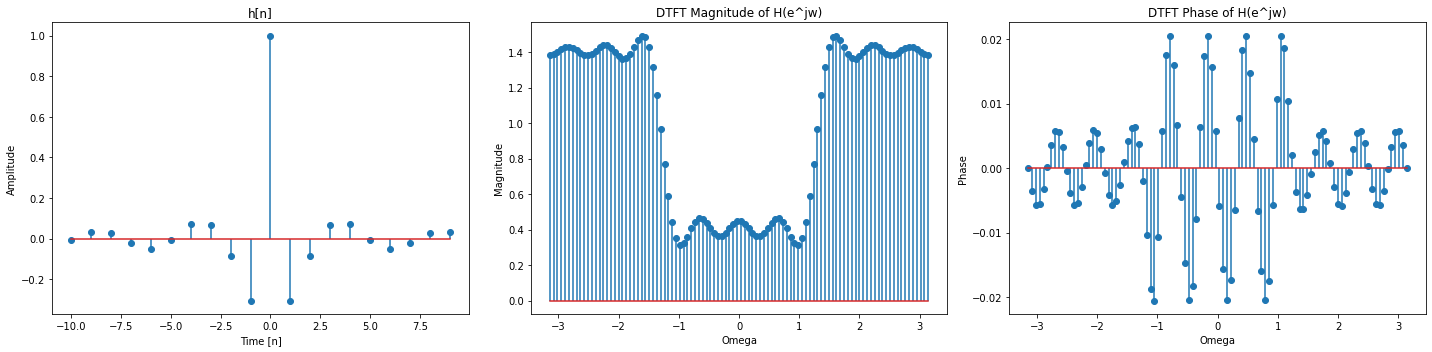

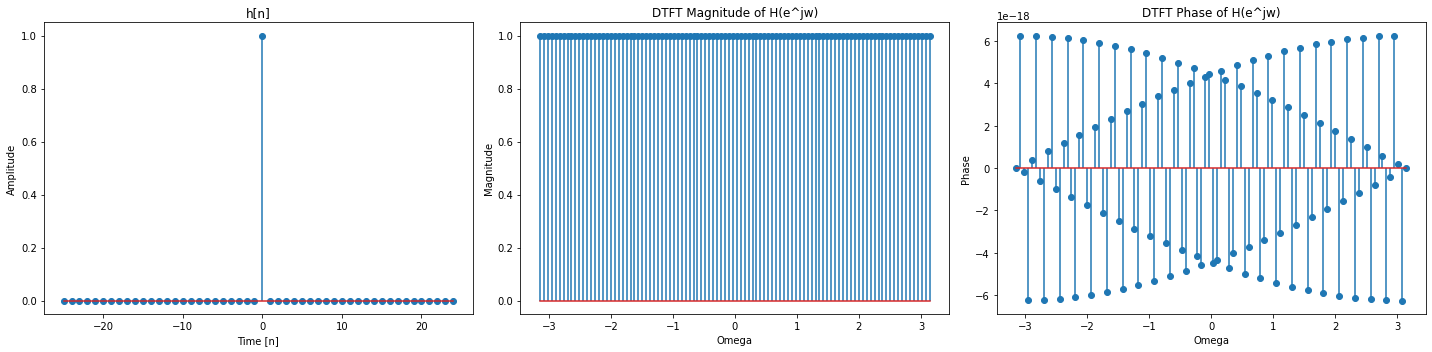

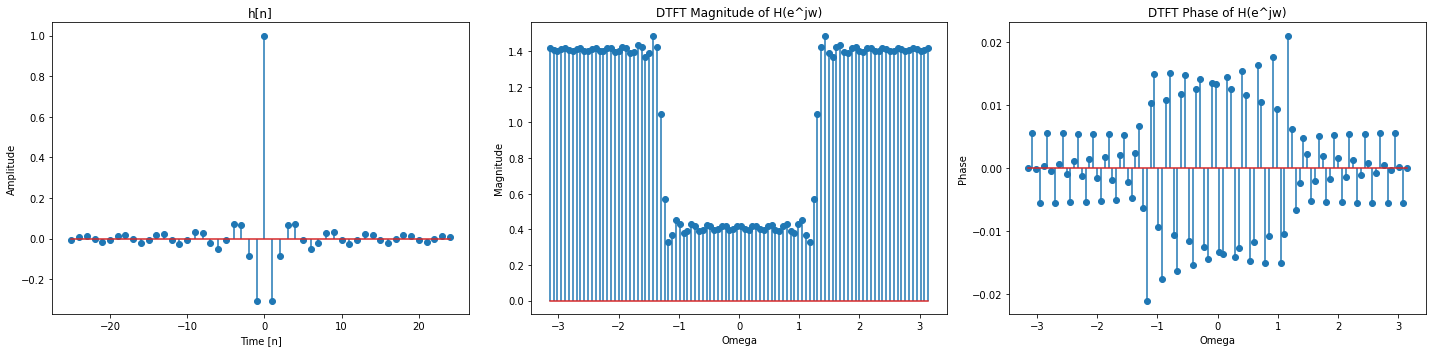

In [234]:
M = 10
omega = 0.5 * np.pi
n = np.arange(-M, M)
n[M] = 1
h_j = np.sin(omega * n)
h_j = h_j/(np.pi * n)
h_j[M] = 1 # setting h_j[0] = 1
time_j = np.arange(-M, h_j.size - M)
DTFT(h_j, time_j)

omega = 5
h_j = np.sin(omega * n)
h_j = h_j/(np.pi * n)
h_j[M] = 1 # setting h_j[0] = 1
time_j = np.arange(-M, h_j.size - M)
DTFT(h_j, time_j)

M = 25
omega = np.pi
n = np.arange(-M, M)
n[M] = 1
h_j = np.sin(omega * n)
h_j = h_j/(np.pi * n)
h_j[M] = 1 # setting h_j[0] = 1
time_j = np.arange(-M, h_j.size - M)
DTFT(h_j, time_j)

omega = 5
h_j = np.sin(omega * n)
h_j = h_j/(np.pi * n)
h_j[M] = 1 # setting h_j[0] = 1
time_j = np.arange(-M, h_j.size - M)
DTFT(h_j, time_j)

print("From the magnitude spectrums, it appears as though this kernel can act both like an LPF or a HPF, \nor even a delta function depending on the values we chose for the constants and the number of samples.")

### Question 3

Convolving "alarm.wav" and "cry.wav" with the above impulse signals and observing the outputs.

We're using the convolvution code from the previous assignment.

In [235]:
def plot_graphs(title, signal, magnitude, phase, omega):
  plots, graphs = plt.subplots(1, 3, figsize=(20, 5))

  graphs[0].set(xlabel='Time', ylabel='Amplitude')
  graphs[0].plot(signal)
  graphs[0].set_title(str(title))

  graphs[1].set_title("DTFT Magnitude of " + str(title))
  graphs[1].set(xlabel='Omega', ylabel='Magnitude')
  graphs[1].stem(omega, magnitude, use_line_collection = True)

  graphs[2].set_title("DTFT Phase of " + str(title))
  graphs[2].set(xlabel='Omega', ylabel='Phase')
  graphs[2].stem(omega, phase, use_line_collection = True)

  plots.tight_layout()
  plots.show()

In [236]:
# function to calculate DTFT of a given x
def DTFT_Q3(x):
  n = x.size
  samples = 100
  omega = np.linspace(-np.pi, np.pi, samples)
  X = np.zeros(samples, dtype=complex)
  for w in range(samples):
    wn = omega[w] * (np.arange(n))
    real = (x * np.cos(wn)).sum()
    imag = (x * np.sin(wn)).sum()

    # X(e^-j*omega[w]) = SUM(x * cos(omega[w])) - j *  SUM(x * sin(omega[w])) = A - jB
    X[w] = real - imag * np.array([1j])

  magnitude = np.sqrt((X.real)*(X.real) + (X.imag)*(X.imag))
  phase = np.angle(X)

  return magnitude, phase, omega

In [237]:
# function to read an audio file
def read_wav(audio):
  read_audio = wave.open(audio, "r")
  audio_file = read_audio.readframes(-1)
  audio_file = np.frombuffer(audio_file, dtype=np.uint8)
  framerate = read_audio.getframerate()
  read_audio.close()

  return audio_file

In [238]:
# function for convolving a feature vector with a kernel
def convolve(input, kernel, audio_name):
  # converting all arrays to float16 so as to not loose any information due to type casting
  input = np.float16(input)
  kernel = np.float16(kernel)

  # plotting the DTFT and the waveform of the input signal
  magnitude, phase, omega = DTFT_Q3(input)
  plot_graphs(str(audio_name[2:]), input, magnitude, phase, omega)

  #converting
  input_size = input.size
  kernel_size = kernel.size

  # flipping the kernel
  kernel = np.flip(kernel)
  padding = kernel_size // 2
  output_size = int((input_size - kernel_size + 2 * padding) + 1)

  # padding the input array with zeros on both ends
  padded = np.zeros((input_size + padding * 2))
  # setting inner portion to the input array
  padded[padding:-1 * padding] = input

  output = np.zeros(output_size)
  output = np.float16(output)
  # filling the output array with the convolved values
  for i in range(output_size):
    output[i] = (kernel * padded[i:i + kernel_size]).sum()

  # plotting the DTFT and the waveform of the convolved signal
  magnitude, phase, omega = DTFT_Q3(output)
  plot_graphs("Convolved " + str(audio_name[2:]), output, magnitude, phase, omega)

  # converting the output to uint8 format so no information is lost due to change in size
  # essentially, scaling everything down from float16 to uint8 because that's how data is stored in .wav files
  # this particular line of code was adapted from a stackoverflow article
  output = np.uint8(output/np.max(np.abs(output)) * 256)

  # writing the convolved audio to another .wav file
  convolved_audio = wave.open(str(audio_name), "w")
  convolved_audio.setnchannels(1)
  convolved_audio.setsampwidth(1)
  convolved_audio.setframerate(output_size)
  convolved_audio.writeframes(output)
  # playsound(convolved_audio)
  convolved_audio.close()

In [239]:
alarm = read_wav("alarm.wav")
cry = read_wav("cry.wav")

##### (a)

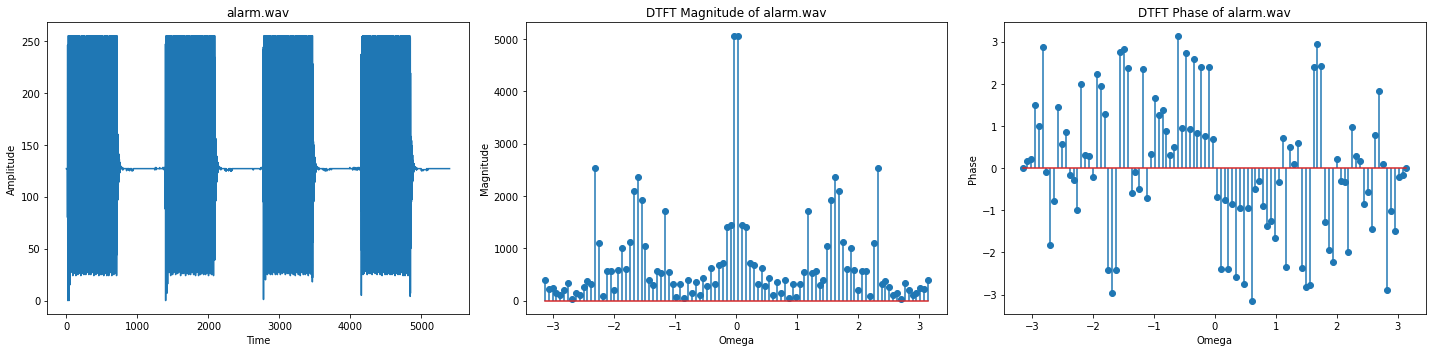

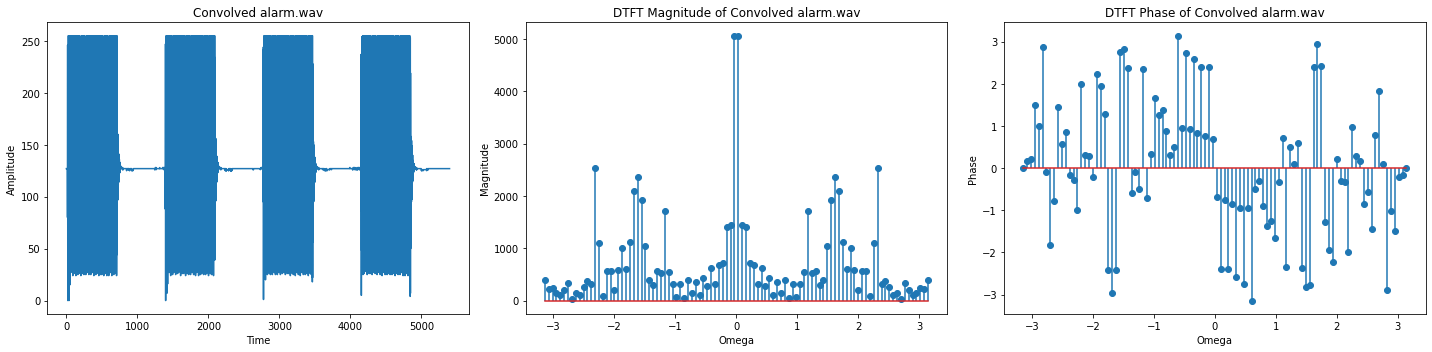

In [240]:
convolve(alarm, h_a, "a_alarm.wav")

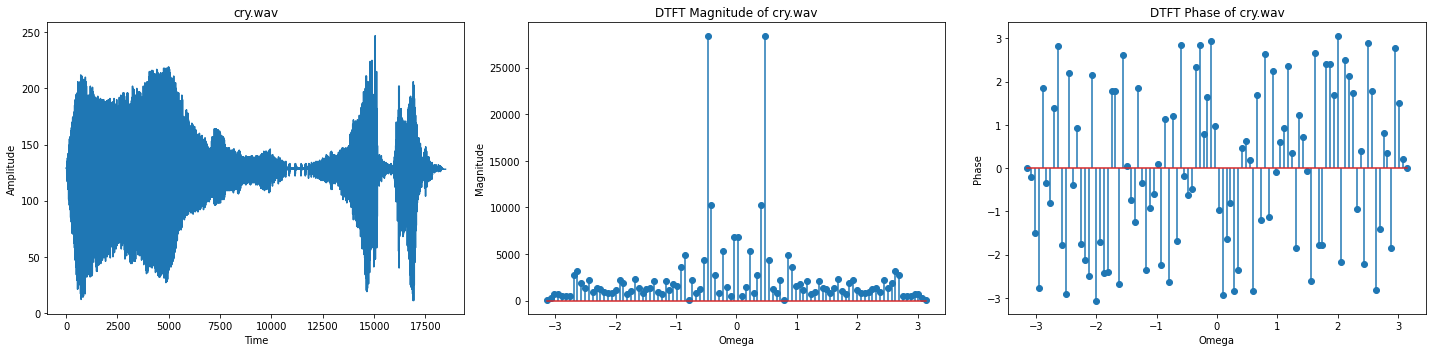

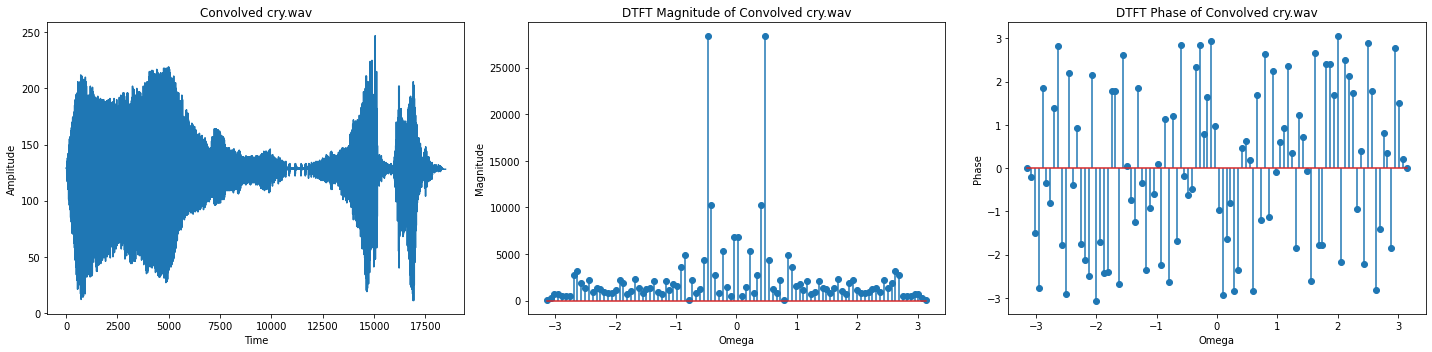

In [241]:
convolve(cry, h_a, "a_cry.wav")

As expected, convolving with a delta function doesn't change the input signal in any way.

##### (b)

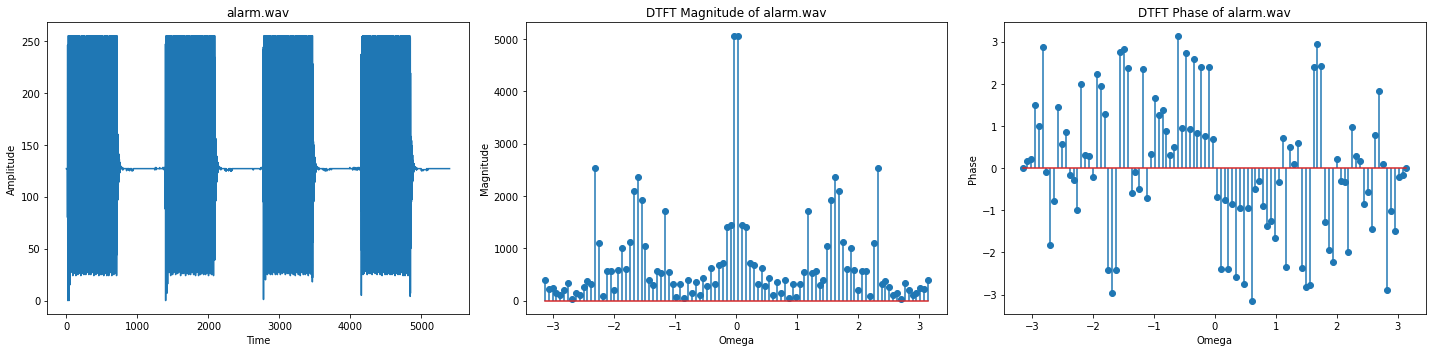

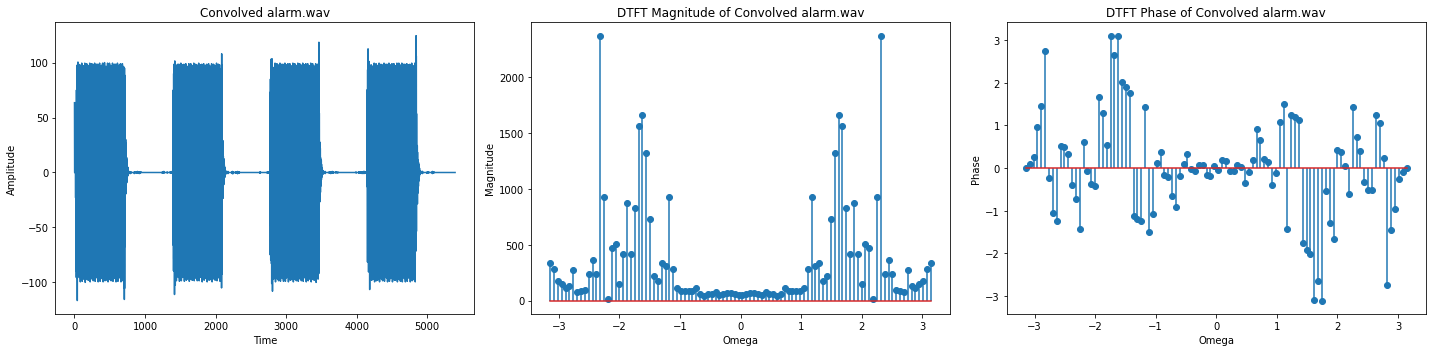

In [242]:
convolve(alarm, h_b, "b_alarm.wav")

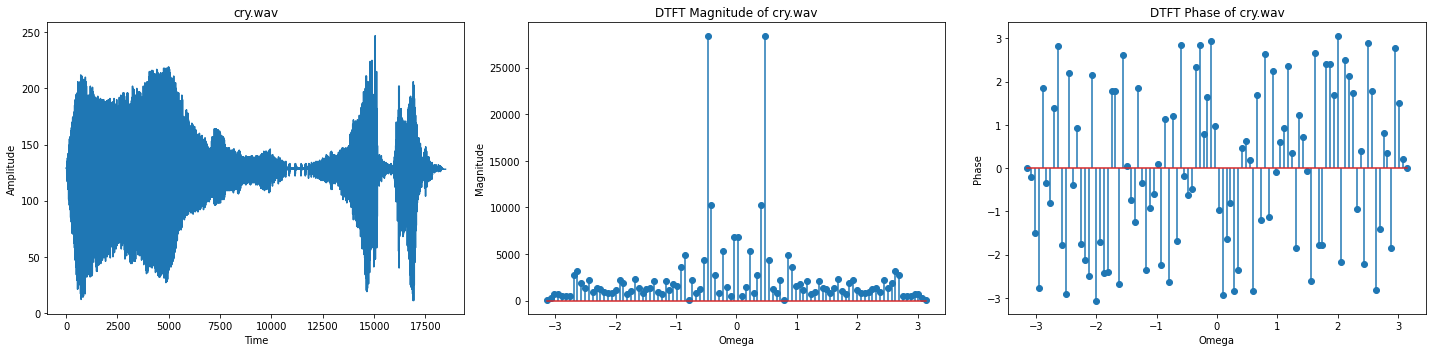

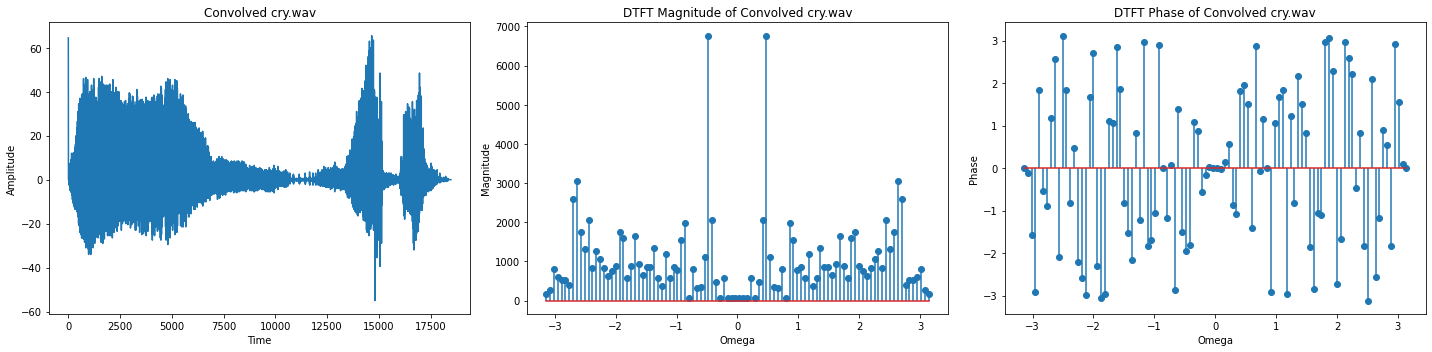

In [243]:
convolve(cry, h_b, "b_cry.wav")

As expected from question 2, this filter supresses the lower frequencies and allows the higher ones to pass. Thus, the audio files have been passed through a HPF.

##### (c)

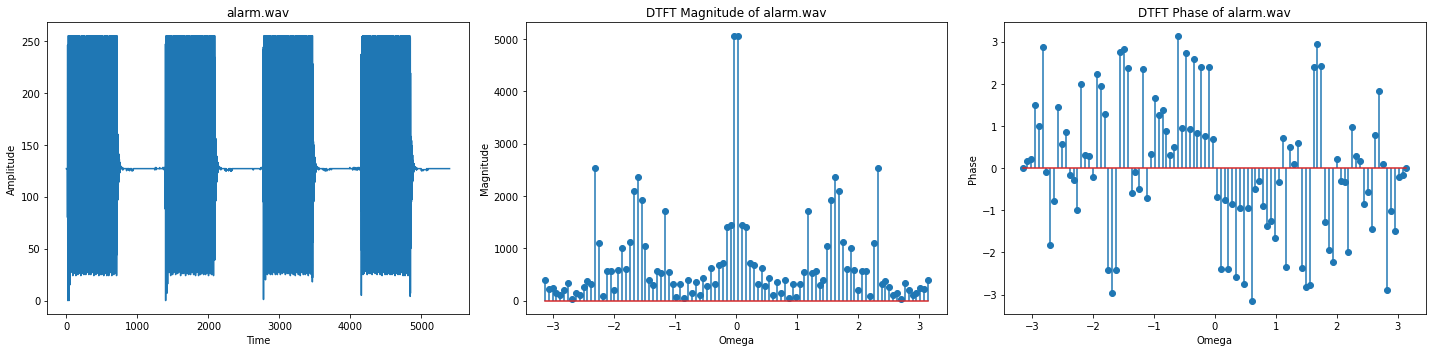

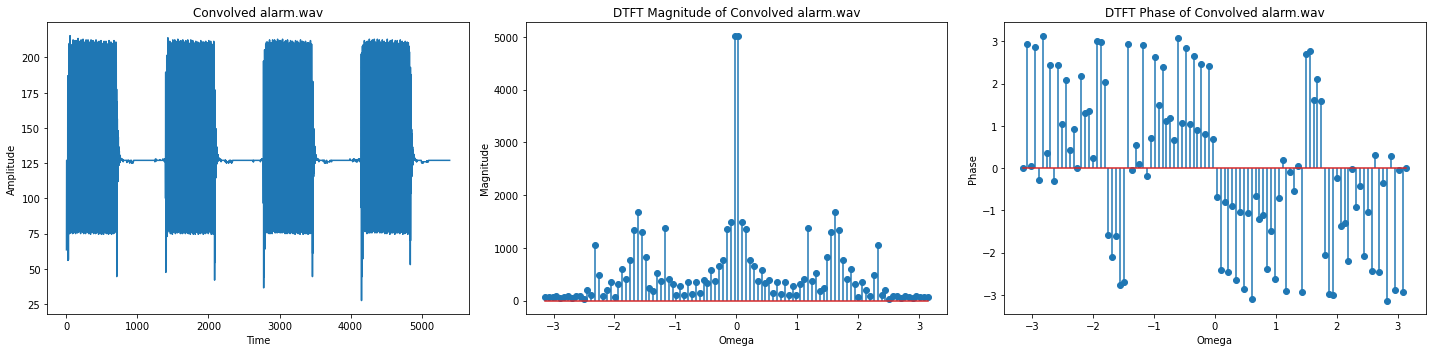

In [244]:
convolve(alarm, h_c, "c_alarm.wav")

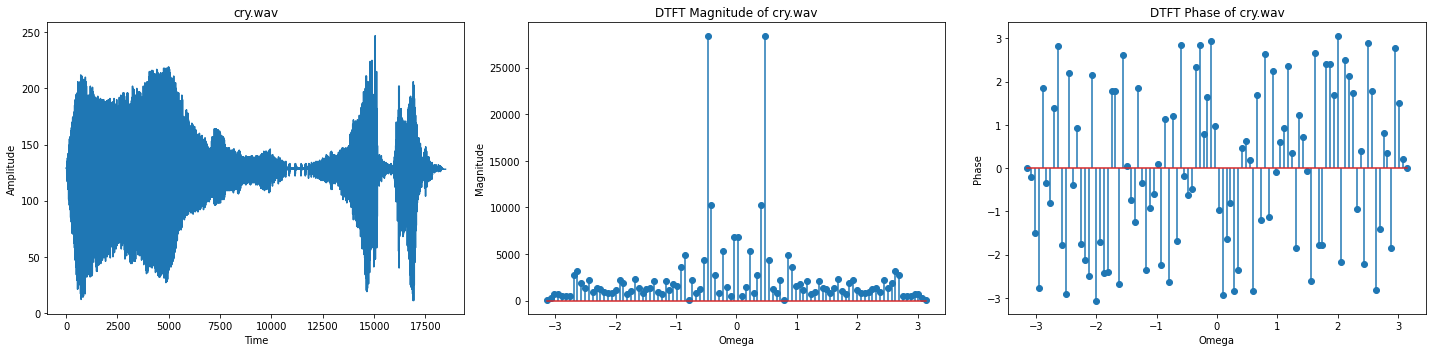

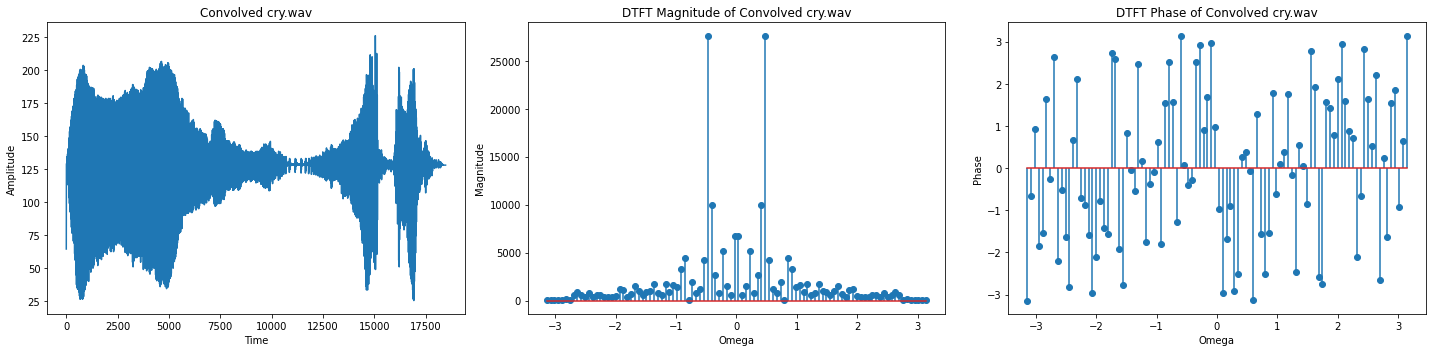

In [245]:
convolve(cry, h_c, "c_cry.wav")

On observing the magnitude spectrum of the DTFT of both the audio signals, it appears as though the signal was passed through a LPF with a rather large bandwidth. This agrees with our observations in 2c.

##### (d)

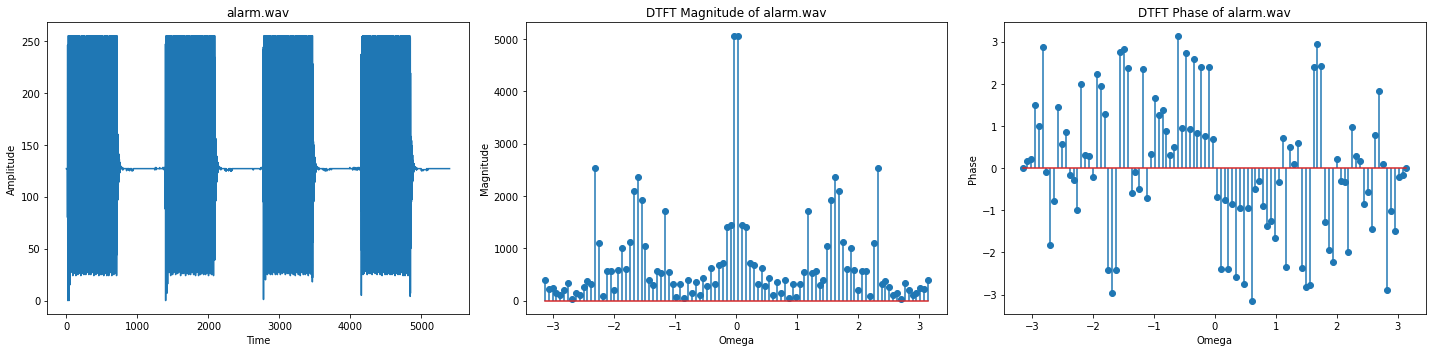

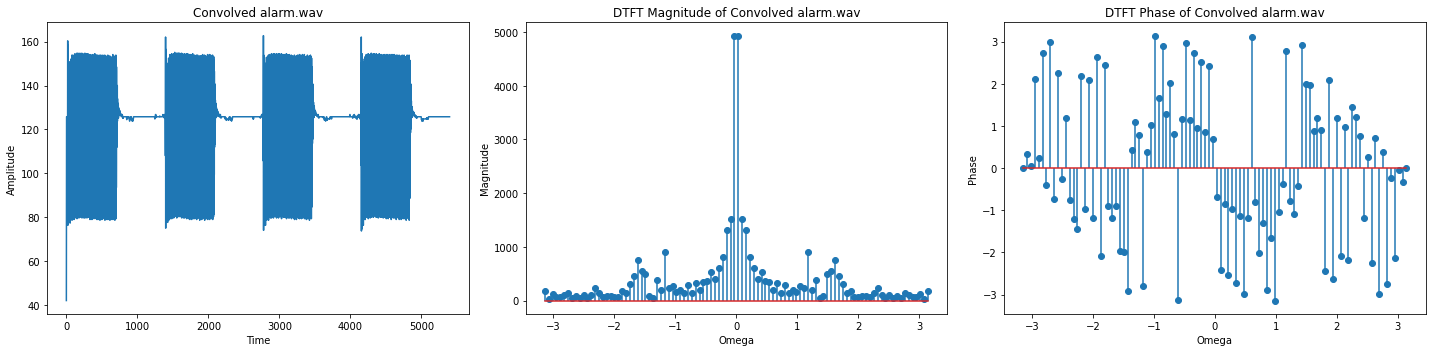

In [246]:
convolve(alarm, h_d, "d_alarm.wav")

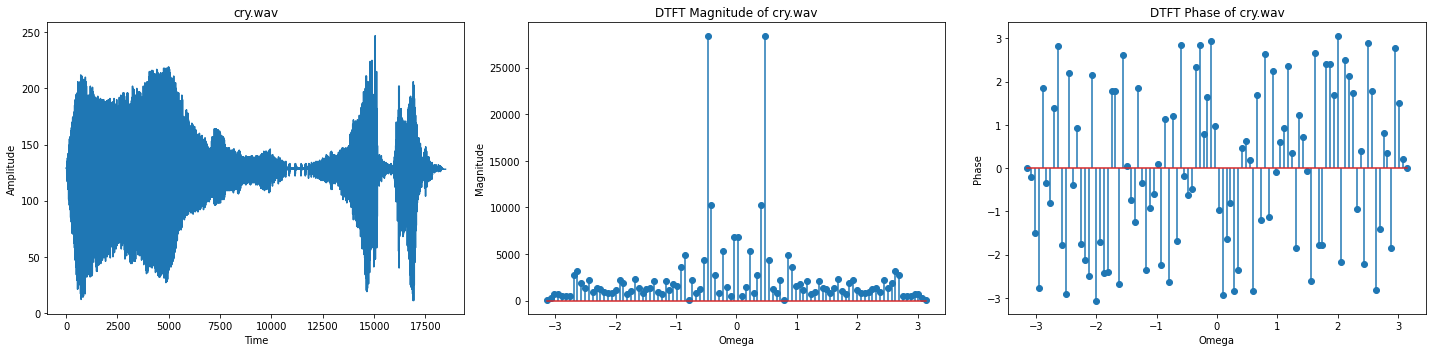

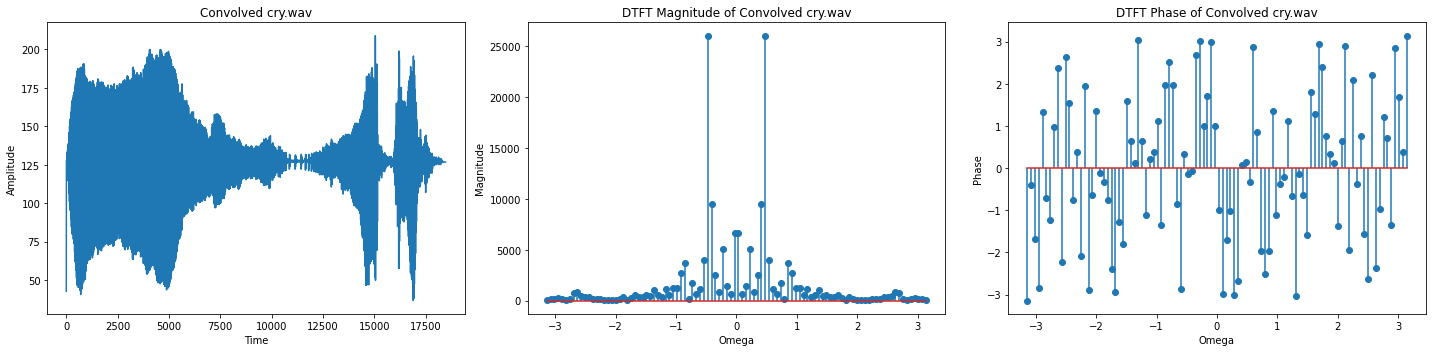

In [260]:
convolve(cry, h_d, "d_cry.wav")

These DTFT spectrum's are in accordance with what we expected from question 2d.

##### (e)

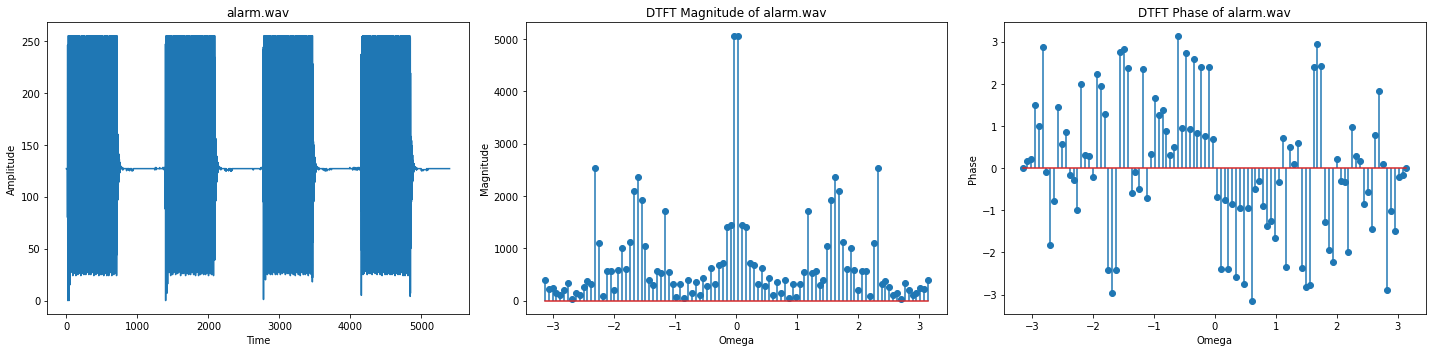

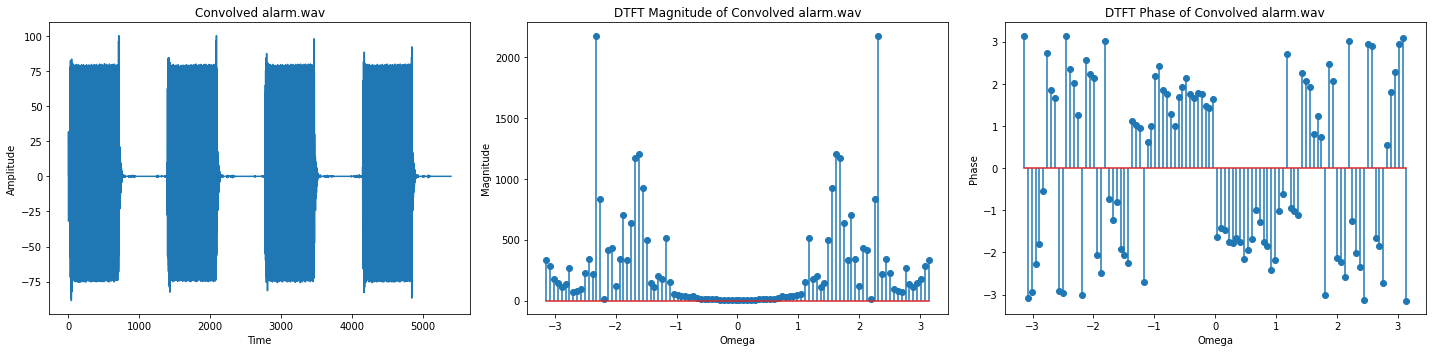

In [248]:
convolve(alarm, h_e, "e_alarm.wav")

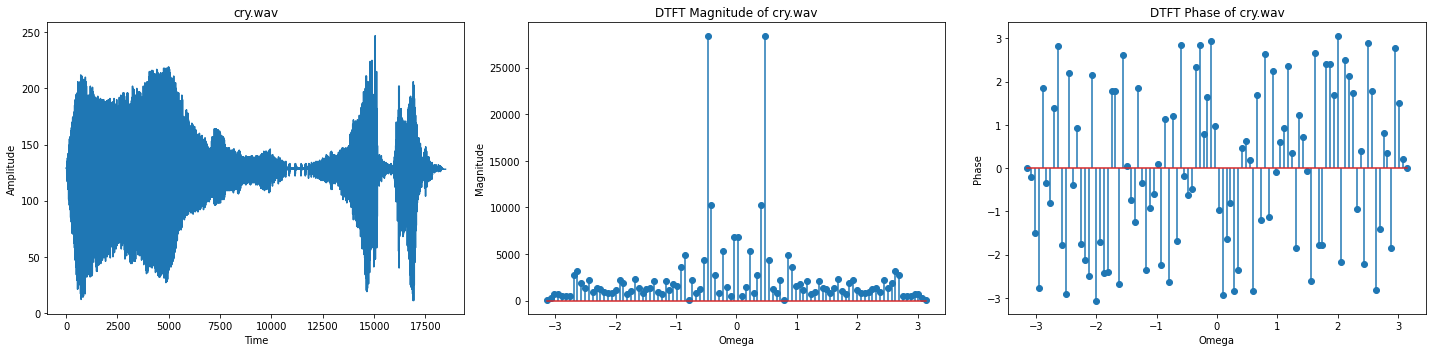

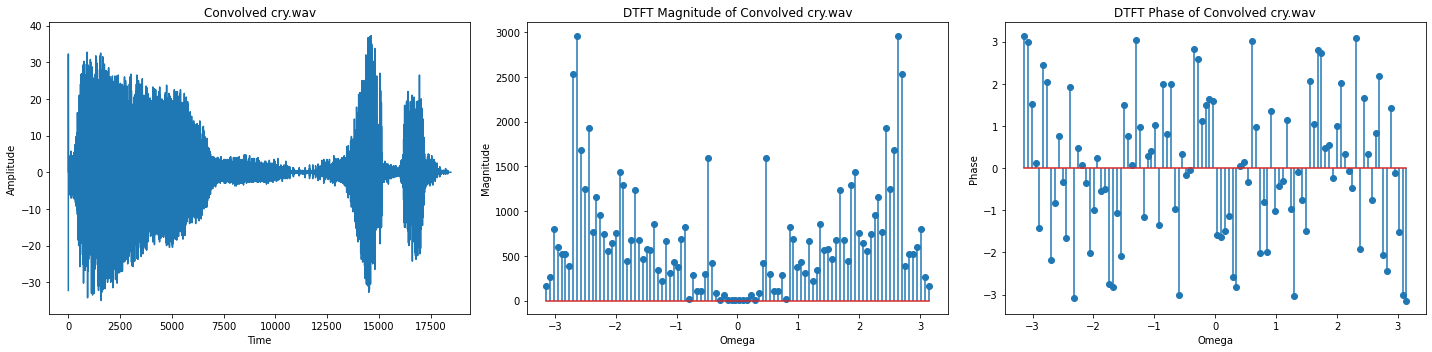

In [249]:
convolve(cry, h_e, "e_cry.wav")

This filter clearly acts like a high pass filter like h_b, but with some slight changes in the bandwitdh and some differences in the way some of the higher frequencies were modified.

##### (f)

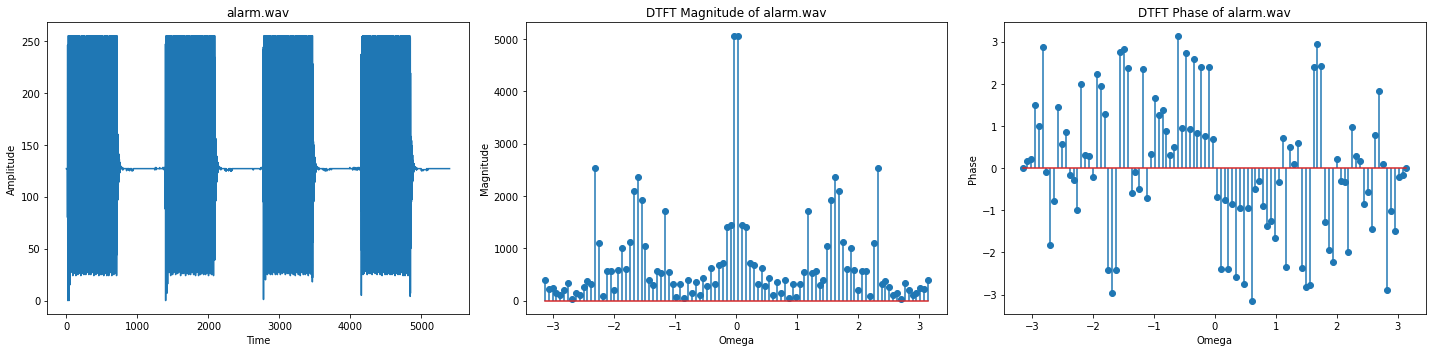

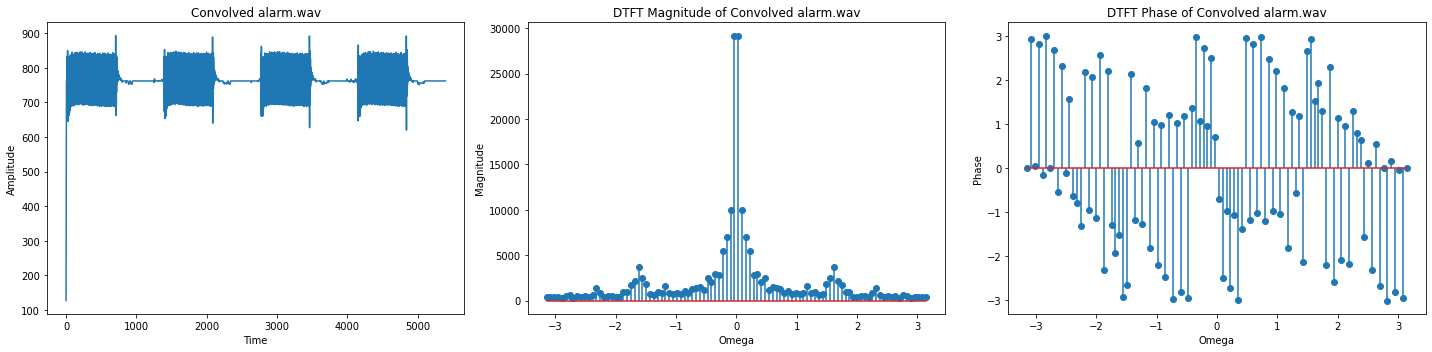

In [250]:
convolve(alarm, h_f, "f_alarm.wav")

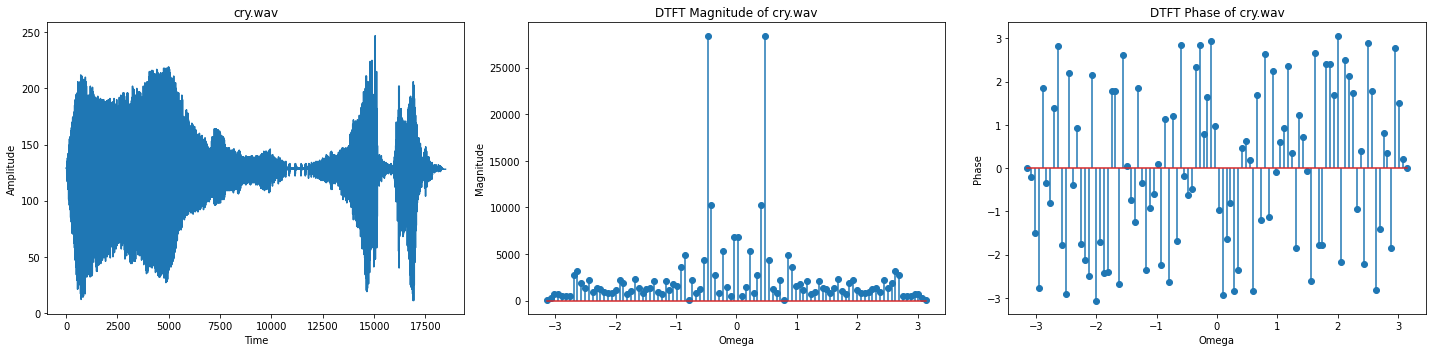

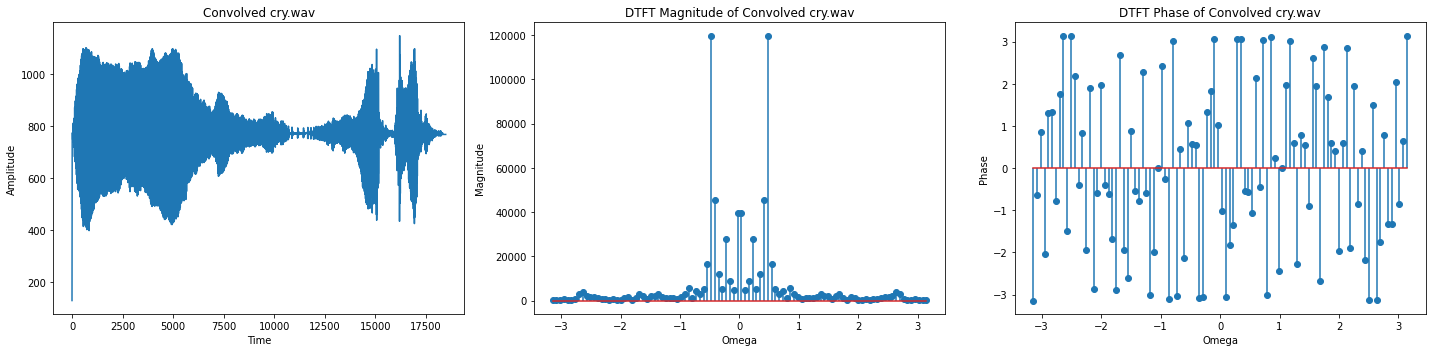

In [251]:
convolve(cry, h_f, "f_cry.wav")

As expected from question 2, this filter acts like a low pass filter which allows SOME higher frequencies to pass through.

##### (g)

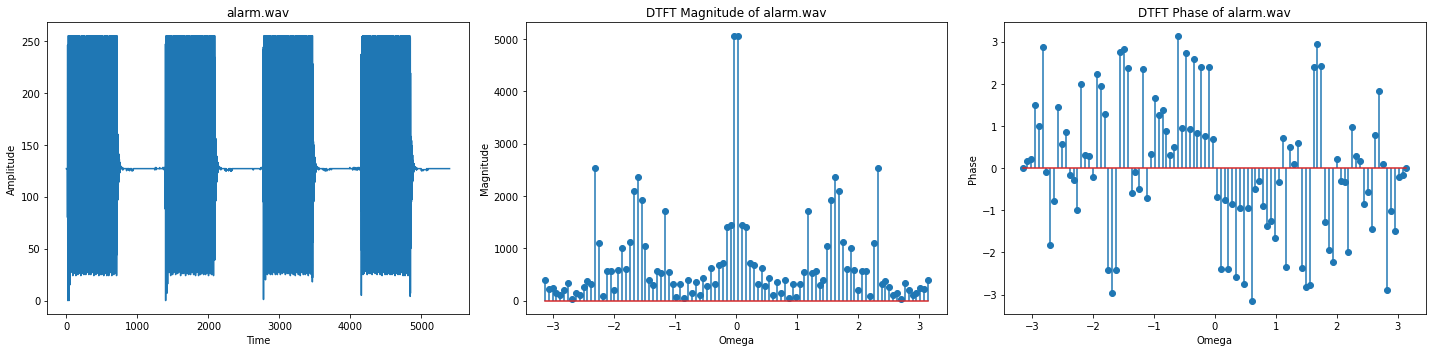

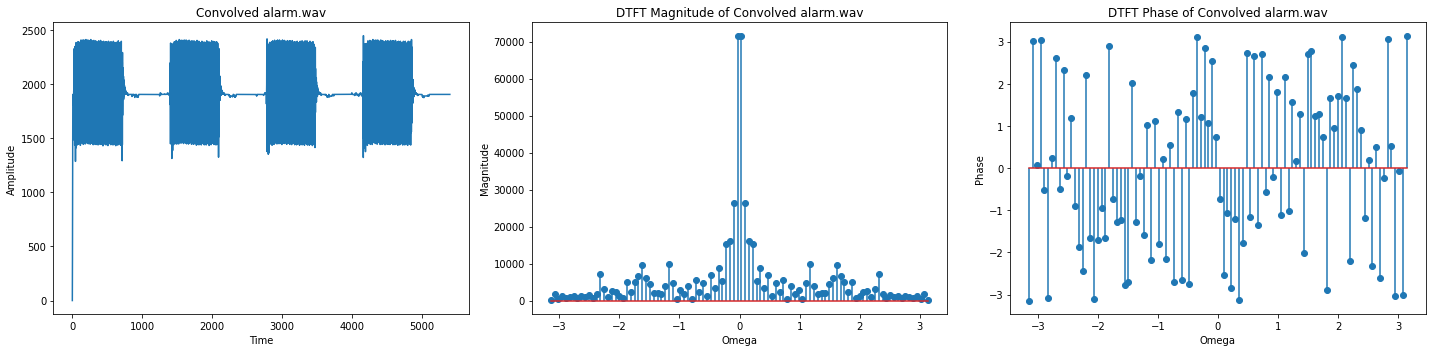

In [252]:
convolve(alarm, h_g, "g_alarm.wav")

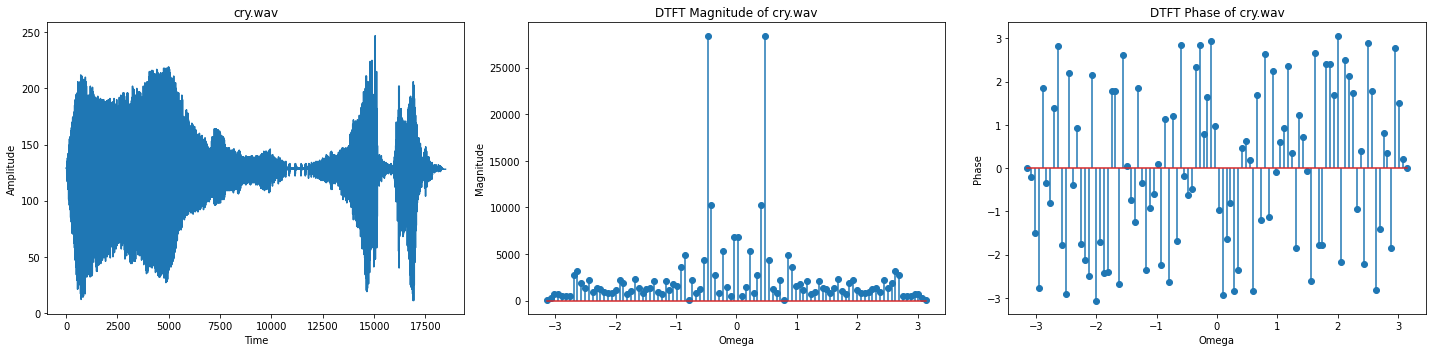

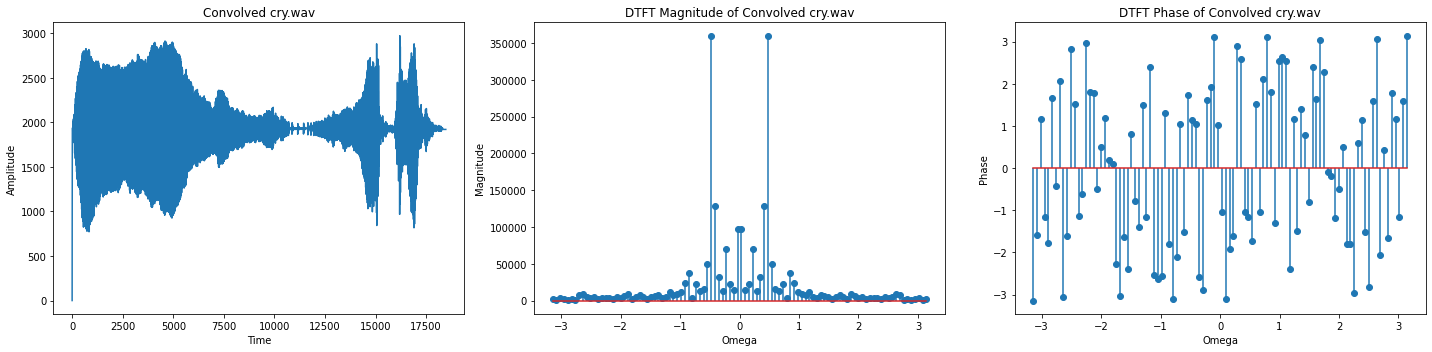

In [253]:
convolve(cry, h_g, "g_cry.wav")

This filter is majorly a low pass filter, but it allows significant higher frequencies to pass through. In my opinion, because it boosts the lower frequencies, the audio file sounds slightly bassy.

##### (h)

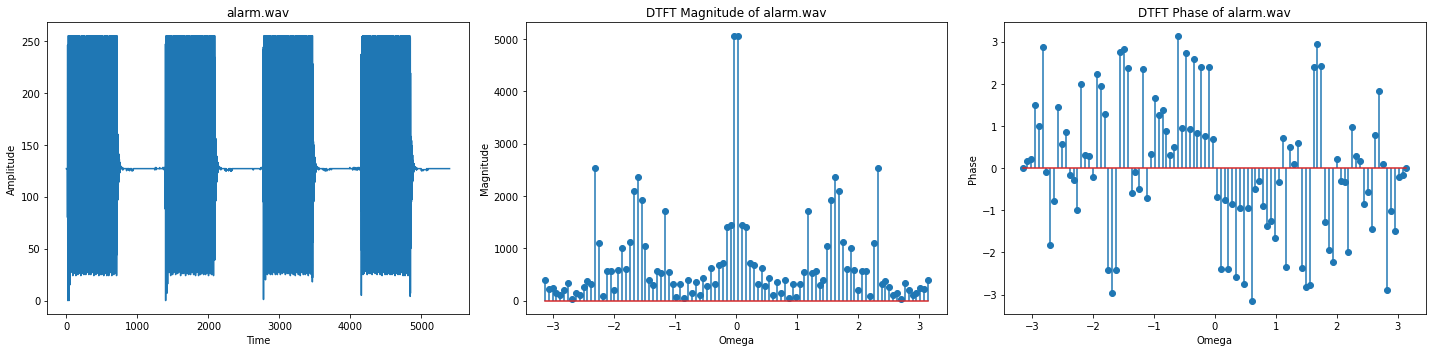

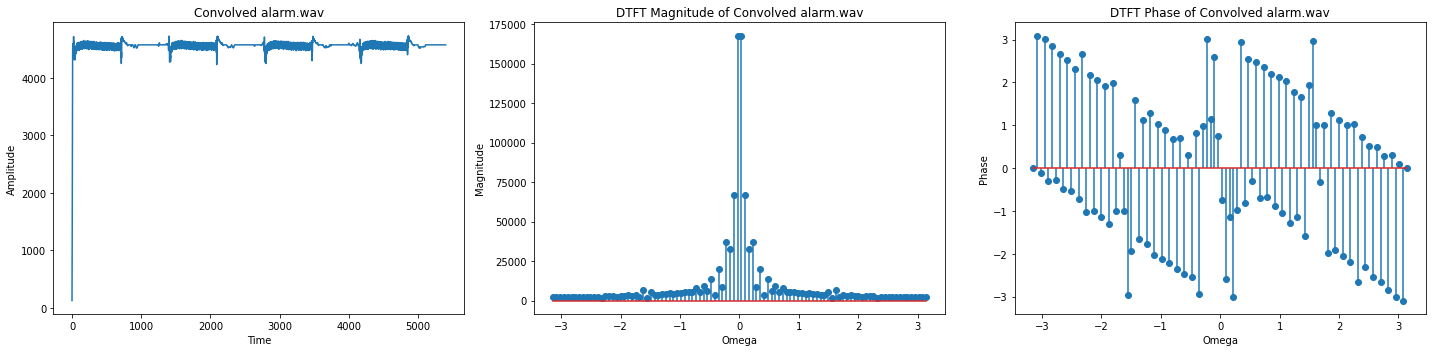

In [254]:
convolve(alarm, h_h, "h_alarm.wav")

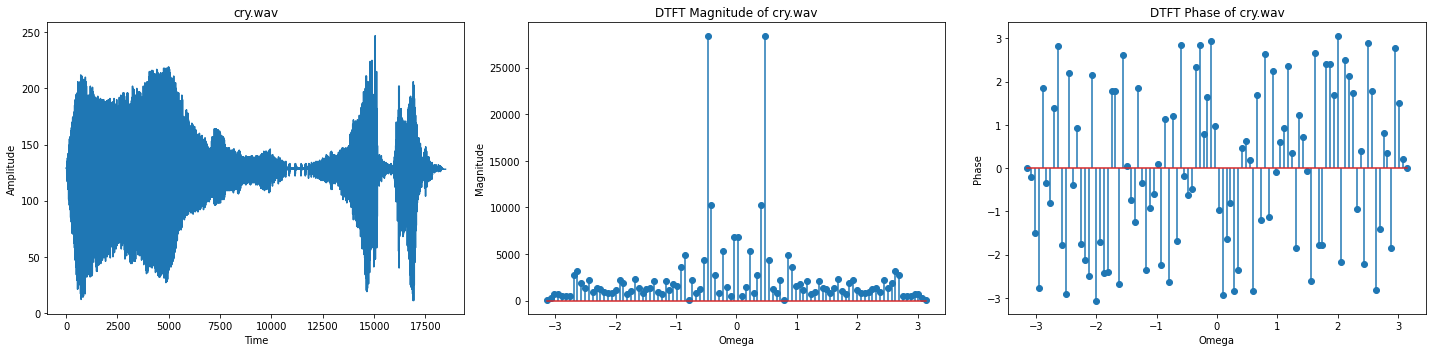

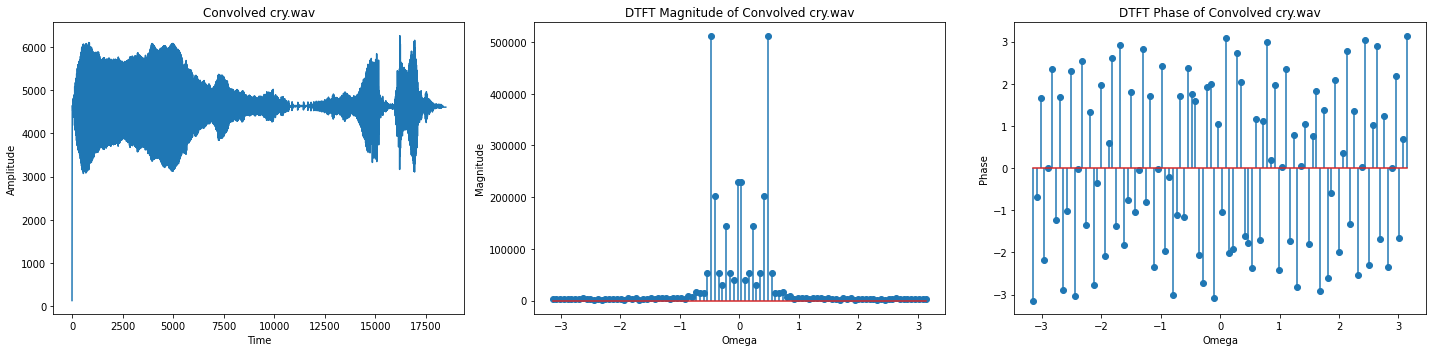

In [255]:
convolve(cry, h_h, "h_cry.wav")

This filter amplifies the lower frequencies and barely allows any of the higher frequencies to pass through, thereby acting like a fairly efficient LPF.

##### (i)

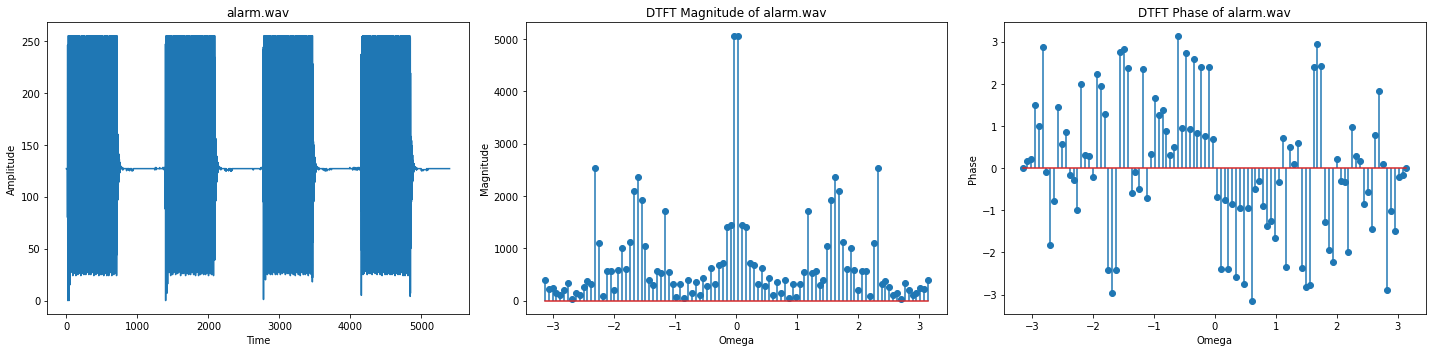

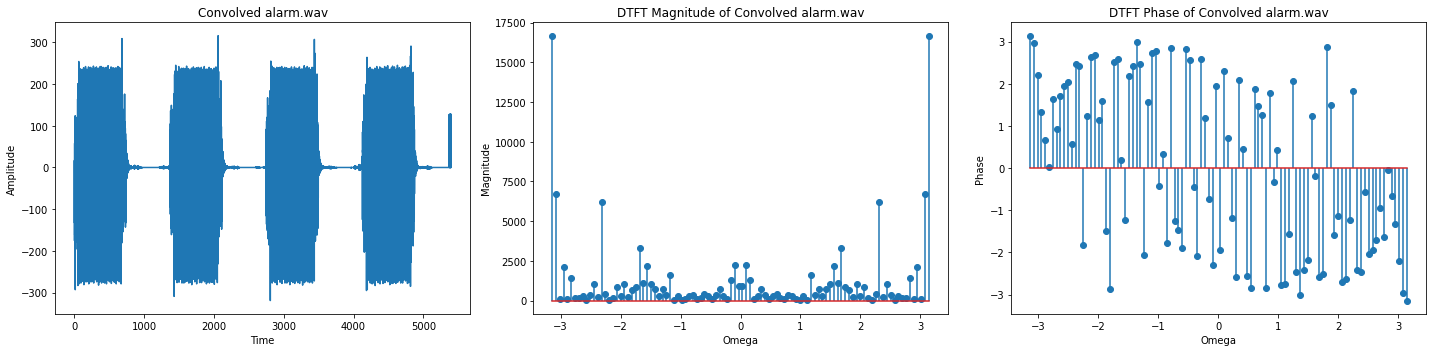

In [256]:
convolve(alarm, h_i, "i_alarm.wav")

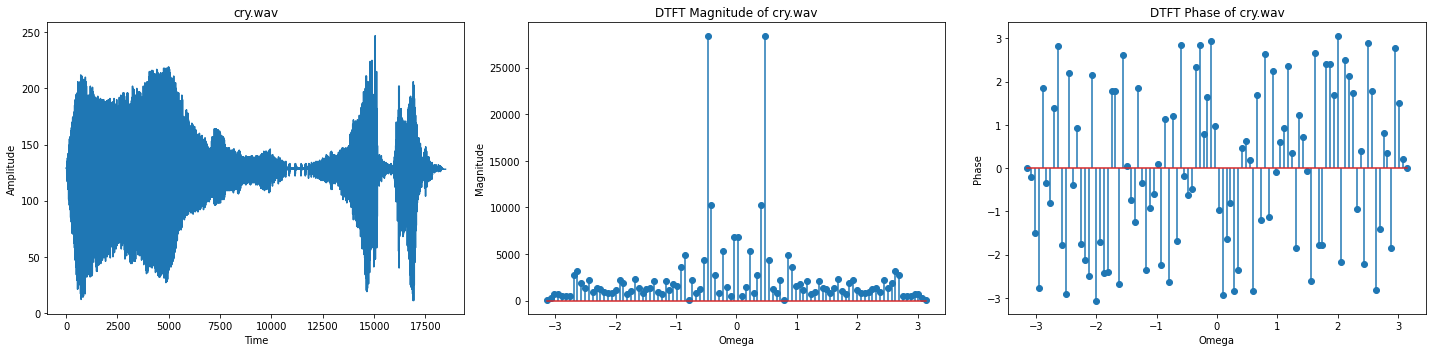

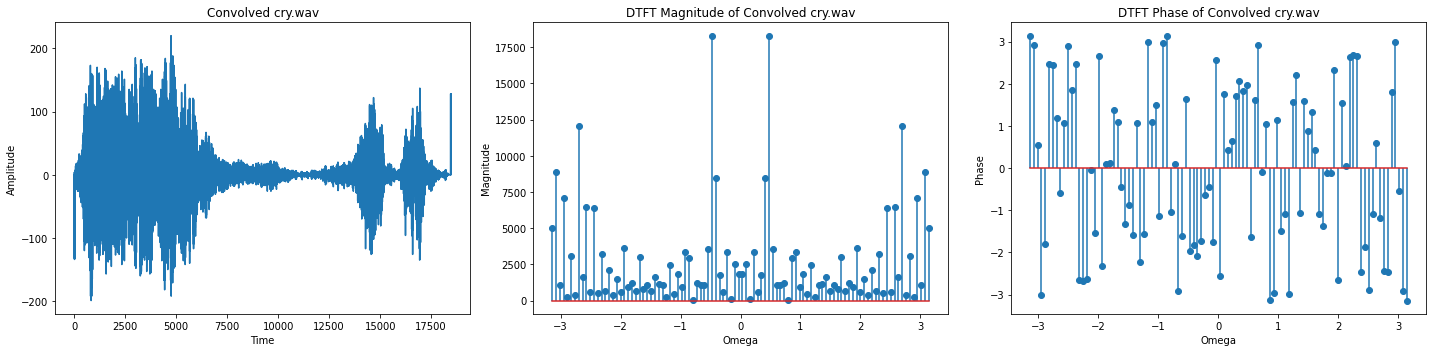

In [257]:
convolve(cry, h_i, "i_cry.wav")

This kernel appears to amplify the higher frequencies and suppresses some of the lower frequencies.

##### (j)

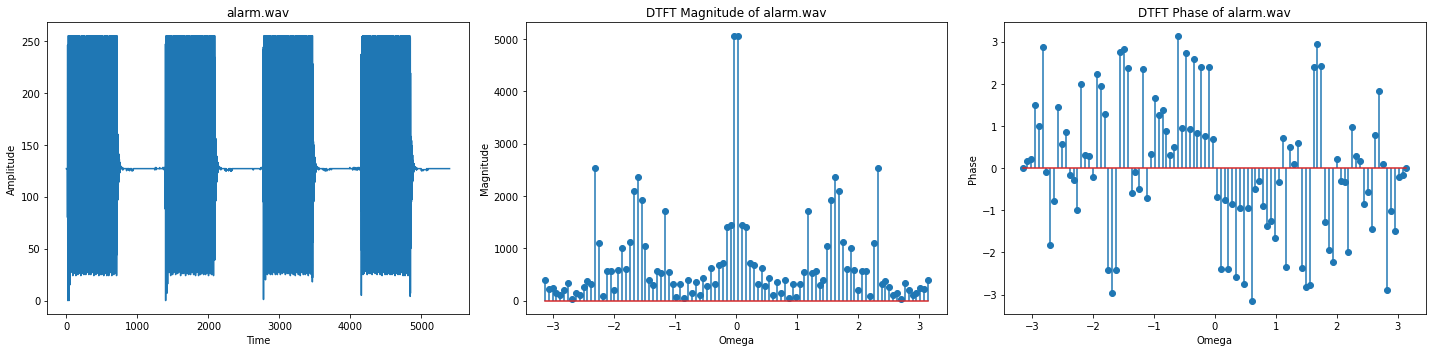

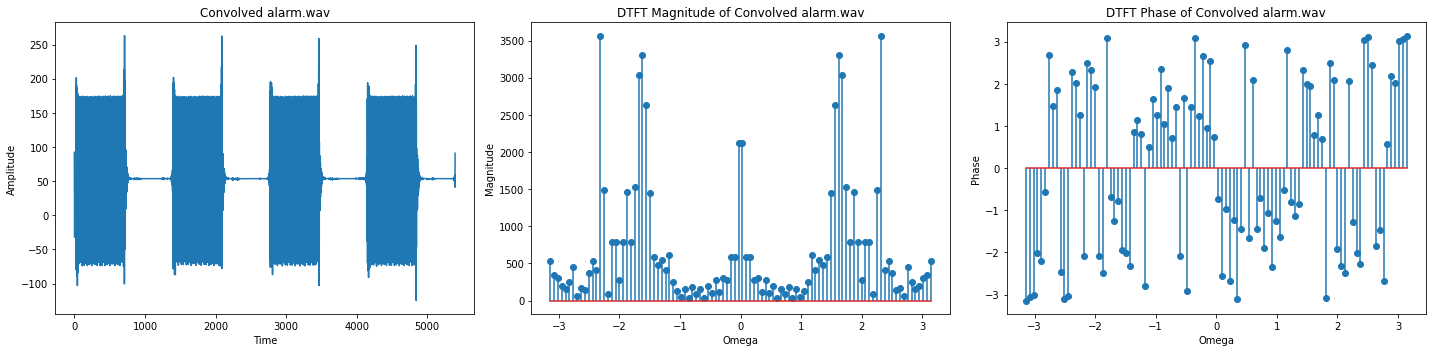

In [258]:
convolve(alarm, h_j, "j_alarm.wav")

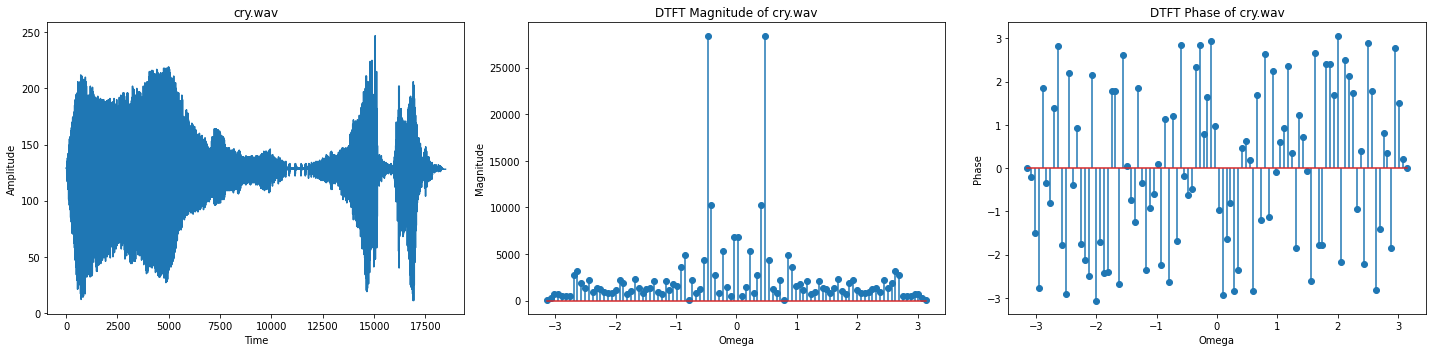

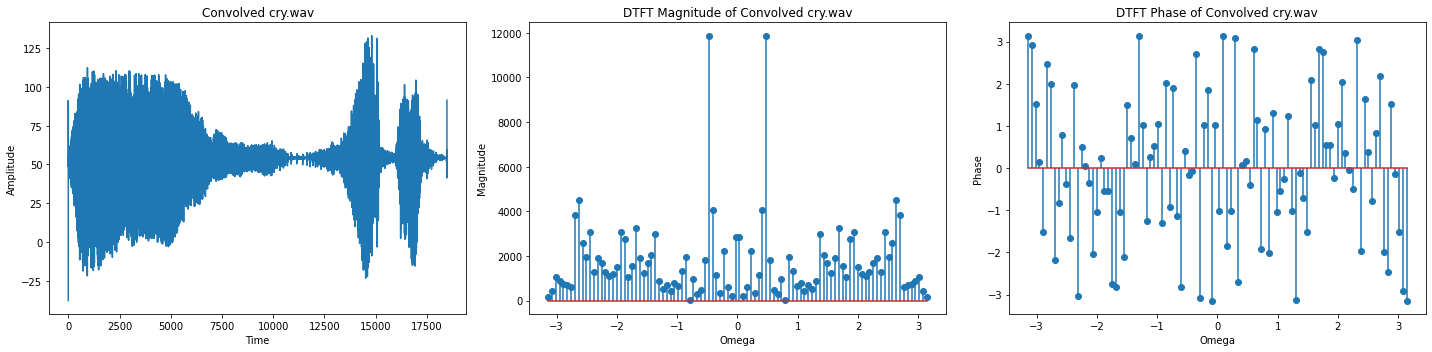

In [259]:
convolve(cry, h_j, "j_cry.wav")

This filter is the last filter from 2j. As expected, it amplifies the higher frequencies a little and suppresses the lower frequencies.

On listening to all the audio files, we can hear that all the characteristics mentioned in question 2 have been verified.